In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Import Data

In [2]:
# TRAIN

# Load WRF 3km
T_WRF_3km = np.load('Analysis/T_WRF_3km.npy')
U_WRF_3km = np.load('Analysis/U_WRF_3km.npy')
V_WRF_3km = np.load('Analysis/V_WRF_3km.npy')

# Load WRF 9km
T_WRF_9km = np.load('Analysis/T_WRF_9km.npy')
U_WRF_9km = np.load('Analysis/U_WRF_9km.npy')
V_WRF_9km = np.load('Analysis/V_WRF_9km.npy')

# Load NCEP native (= high resolution)
T_NCEP_near = np.load('Analysis/T_NCEP_near.npy')
U_NCEP_near = np.load('Analysis/U_NCEP_near.npy')
V_NCEP_near = np.load('Analysis/V_NCEP_near.npy')

# Load NCEP down (= low resolution)
T_NCEP_down = np.squeeze(np.load('Analysis/T_NCEP_down.npy'))
U_NCEP_down = np.squeeze(np.load('Analysis/U_NCEP_down.npy'))
V_NCEP_down = np.squeeze(np.load('Analysis/V_NCEP_down.npy'))

#--------------------------new: code as in Blackboard announcement but run in Project_2_pre
# Load WRF 9km down (= med res)
T_WRF_9km_down = np.squeeze(np.load('Analysis/T_WRF_9km_down.npy'))
U_WRF_9km_down = np.squeeze(np.load('Analysis/U_WRF_9km_down.npy'))
V_WRF_9km_down = np.squeeze(np.load('Analysis/V_WRF_9km_down.npy'))

# Load NCEP down (= med resolution)
T_NCEP_down_9 = np.squeeze(np.load('Analysis/T_NCEP_down_9.npy'))
U_NCEP_down_9 = np.squeeze(np.load('Analysis/U_NCEP_down_9.npy'))
V_NCEP_down_9 = np.squeeze(np.load('Analysis/V_NCEP_down_9.npy'))

In [3]:
# TEST

# Load WRF 3km test
T_WRF_3km_test = np.load('Analysis/T_WRF_3km_test.npy')
U_WRF_3km_test = np.load('Analysis/U_WRF_3km_test.npy')
V_WRF_3km_test = np.load('Analysis/V_WRF_3km_test.npy')

# Load WRF 9km test
T_WRF_9km_test = np.load('Analysis/T_WRF_9km_test.npy')
U_WRF_9km_test = np.load('Analysis/U_WRF_9km_test.npy')
V_WRF_9km_test = np.load('Analysis/V_WRF_9km_test.npy')

# Load NCEP test near (new): code as in Blackboard announcement but run in Project_2_pre
T_NCEP_test_near = np.squeeze(np.load('Analysis/T_NCEP_test_near.npy'))
U_NCEP_test_near = np.squeeze(np.load('Analysis/U_NCEP_test_near.npy'))
V_NCEP_test_near = np.squeeze(np.load('Analysis/V_NCEP_test_near.npy'))

# Load NCEP test down
T_NCEP_test_down = np.squeeze(np.load('Analysis/T_NCEP_test_down.npy'))
U_NCEP_test_down = np.squeeze(np.load('Analysis/U_NCEP_test_down.npy'))
V_NCEP_test_down = np.squeeze(np.load('Analysis/V_NCEP_test_down.npy'))

#--------------------------new: code as in Blackboard announcement but run in Project_2_pre
# Load WRF 9km down (= med res)
T_WRF_9km_test_down = np.squeeze(np.load('Analysis/T_WRF_9km_test_down.npy'))
U_WRF_9km_test_down = np.squeeze(np.load('Analysis/U_WRF_9km_test_down.npy'))
V_WRF_9km_test_down = np.squeeze(np.load('Analysis/V_WRF_9km_test_down.npy'))

# Load NCEP down (= med resolution)
T_NCEP_test_down_9 = np.squeeze(np.load('Analysis/T_NCEP_test_down_9.npy'))
U_NCEP_test_down_9 = np.squeeze(np.load('Analysis/U_NCEP_test_down_9.npy'))
V_NCEP_test_down_9 = np.squeeze(np.load('Analysis/V_NCEP_test_down_9.npy'))

# a)

To visualize the training data, first, the mean is taken along the time dimension. The low resolution input to the network is the NCEP data, which has a dimension of 16 by 16 (18 km resolution). In the generator, this data will later be upscaled to a higher resolution of 9 km by using a deconvolution layer. This training data is plotted on the left side of the following figures.

The medium resolution WRF serves as the label for the network and has a higher dimension of 32 by 32 pixels (9 km resolution). Therefore, more local features are resolved on the right side of the figures.

The plots below show the mean training data map (inputs and labels) for the variables velocity and temperature. For the first plot, the wind velocity is indicated by the colormap and the direction of the wind is signaled by the arrows on top. Here, the NCEP data shows low wind speeds almost uniformly, except for the south east. When comparing to the higher resolution WRF data there are significant differences visible. Firstly, note that due to the higher resolution, every pixel from NCEP is now represented by 4 pixels and consequently also 4 arrows. While that is what you would naturally expect by going to a higher resolution, there is another striking difference. While the stronger wind in the lower right corner is still visible, very strong winds are now recognizible in the upper half of the area. Those were simply not present in the coarser NCEP data set. It is going to be interesting to see if the GAN is ultimately able to reproduce these winds that seem to come "out of nowhere". 

Below the figures of the wind speed, the mean temperature of the area is plotted for the low and medium resolution data sets. Here, the result is not as surprising and the higher resolution image look like the lower resolution counterpart with just a bit smoother transitions where the temperature gradient is high.

In [4]:
mean_U10_WRF_9km = np.mean(U_WRF_9km_down, axis=0)
mean_V10_WRF_9km = np.mean(V_WRF_9km_down, axis=0)
mean_T2m_WRF_9km = np.mean(T_WRF_9km_down, axis=0)

mean_U10_NCEP_near = np.mean(U_NCEP_down_9, axis=0)
mean_V10_NCEP_near = np.mean(V_NCEP_down_9, axis=0)
mean_T2m_NCEP_near = np.mean(T_NCEP_down_9, axis=0)

mean_U10_NCEP_down = np.mean(U_NCEP_down, axis=0)
mean_V10_NCEP_down = np.mean(V_NCEP_down, axis=0)
mean_T2m_NCEP_down = np.mean(T_NCEP_down, axis=0)

# Define the size of the area
area_size = 288  # km

# Calculate the distance step for each resolution
distance_step_3km = area_size / T_WRF_3km.shape[1]
distance_step_9km = area_size / T_WRF_9km_down.shape[1]
distance_step_NCEP_near = area_size / T_NCEP_near.shape[1]
distance_step_NCEP_down = area_size / T_NCEP_down.shape[1]

# x_3km = np.arange(0, T_WRF_3km.shape[1], 1) * distance_step_3km
x_9km = np.arange(0, mean_T2m_WRF_9km.shape[1], 1) * distance_step_9km + distance_step_9km / 2
x_NCEP_down = np.arange(0, mean_T2m_NCEP_down.shape[1], 1) * distance_step_NCEP_down + distance_step_NCEP_down / 2

def calculate_total_velocity(vx, vy):
    vx_squared = np.square(vx)
    vy_squared = np.square(vy)
    sum_of_squares = vx_squared + vy_squared
    total_velocity = np.sqrt(sum_of_squares)
    return total_velocity

# wind_speed_WRF_3km = calculate_total_velocity(mean_U10_WRF_3km, mean_V10_WRF_3km)
wind_speed_WRF_9km = calculate_total_velocity(mean_U10_WRF_9km, mean_V10_WRF_9km)
wind_speed_NCEP_near = calculate_total_velocity(mean_U10_NCEP_near, mean_V10_NCEP_near)
wind_speed_NCEP_down = calculate_total_velocity(mean_U10_NCEP_down, mean_V10_NCEP_down)

C:\Users\benne\AppData\Local\Temp\ipykernel_20668\4043321167.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


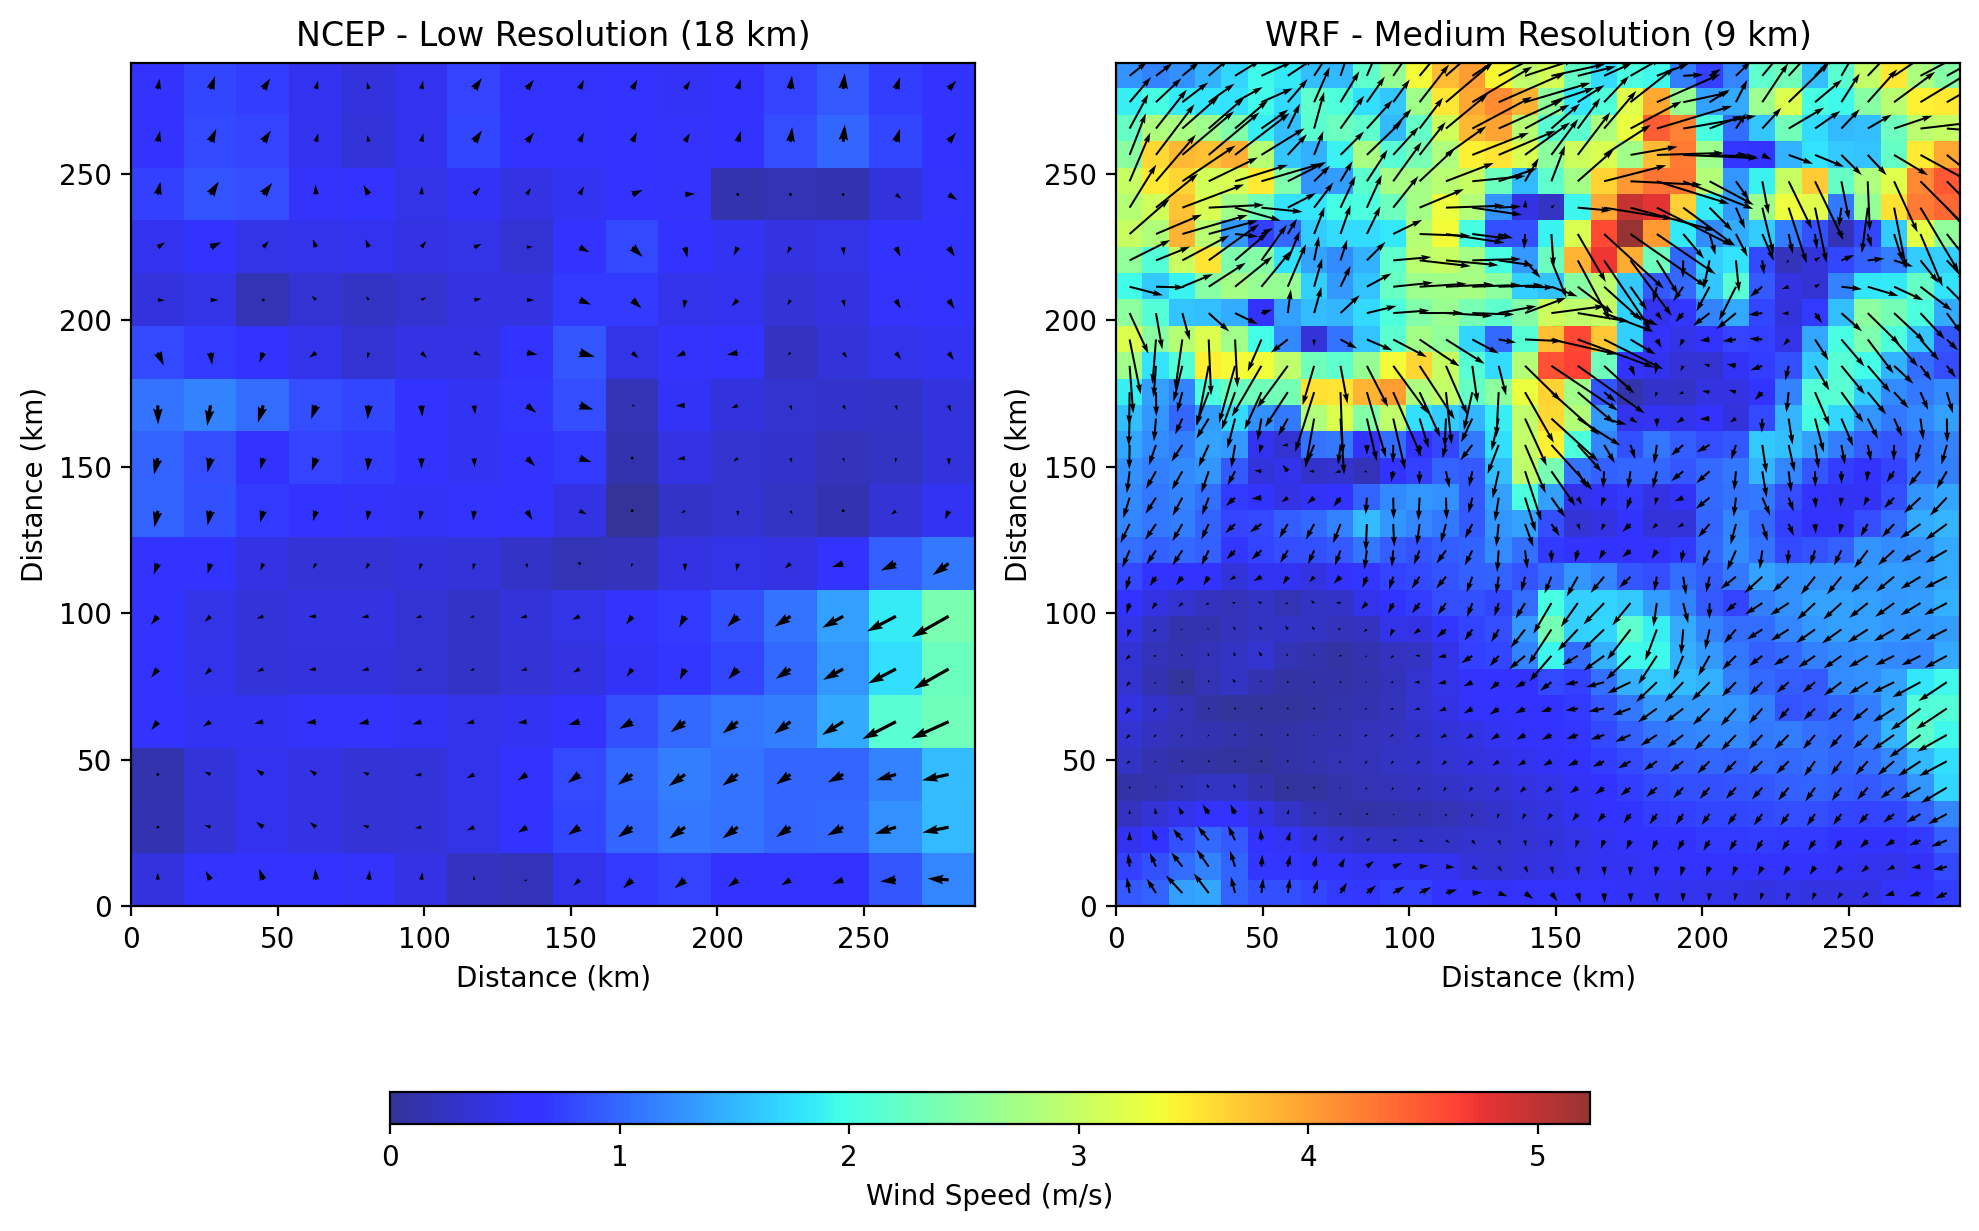

In [5]:
# Create the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 8), dpi=200)

cmap = 'jet'

# Calculate the minimum and maximum wind speed values across all datasets
vmin = 0
vmax = np.max([wind_speed_WRF_9km.max(), wind_speed_NCEP_near.max(), wind_speed_NCEP_down.max()])
max_wind_speed = np.max([mean_V10_WRF_9km.max(), mean_V10_NCEP_near.max(), mean_V10_NCEP_down.max(), 
                        mean_U10_WRF_9km.max(), mean_U10_NCEP_near.max(), mean_U10_NCEP_down.max()])

# Set a scaling factor based on the desired arrow length
arrow_length = 10  # Adjust this value as needed
scale_factor = max_wind_speed * arrow_length

# Plot for 9km
ax2 = axes[1]
ax2.quiver(x_9km, x_9km, mean_U10_WRF_9km, mean_V10_WRF_9km, scale=scale_factor)
im_9km = ax2.imshow(wind_speed_WRF_9km, cmap=cmap, alpha=0.8, origin='lower', extent=[0, area_size, 0, area_size], vmin=vmin, vmax=vmax)
ax2.set_title('WRF - Medium Resolution (9 km)')
ax2.set_xlabel('Distance (km)')
ax2.set_ylabel('Distance (km)')

# Plot for NCEP_down
ax4 = axes[0]
ax4.quiver(x_NCEP_down, x_NCEP_down, mean_U10_NCEP_down, mean_V10_NCEP_down, scale=scale_factor)
im_NCEP_down = ax4.imshow(wind_speed_NCEP_down, cmap=cmap, alpha=0.8, origin='lower', extent=[0, area_size, 0, area_size], vmin=vmin, vmax=vmax)
ax4.set_title('NCEP - Low Resolution (18 km)')
ax4.set_xlabel('Distance (km)')
ax4.set_ylabel('Distance (km)')

# Add a single colorbar for all subplots
cbar = fig.add_axes([0.2, 0.1, 0.6, 0.02])
cbar = fig.colorbar(im_NCEP_down, cax=cbar, orientation='horizontal', label='Wind Speed (m/s)')

# Show the plot
fig.tight_layout()
plt.show()

C:\Users\benne\AppData\Local\Temp\ipykernel_20668\4185023810.py:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


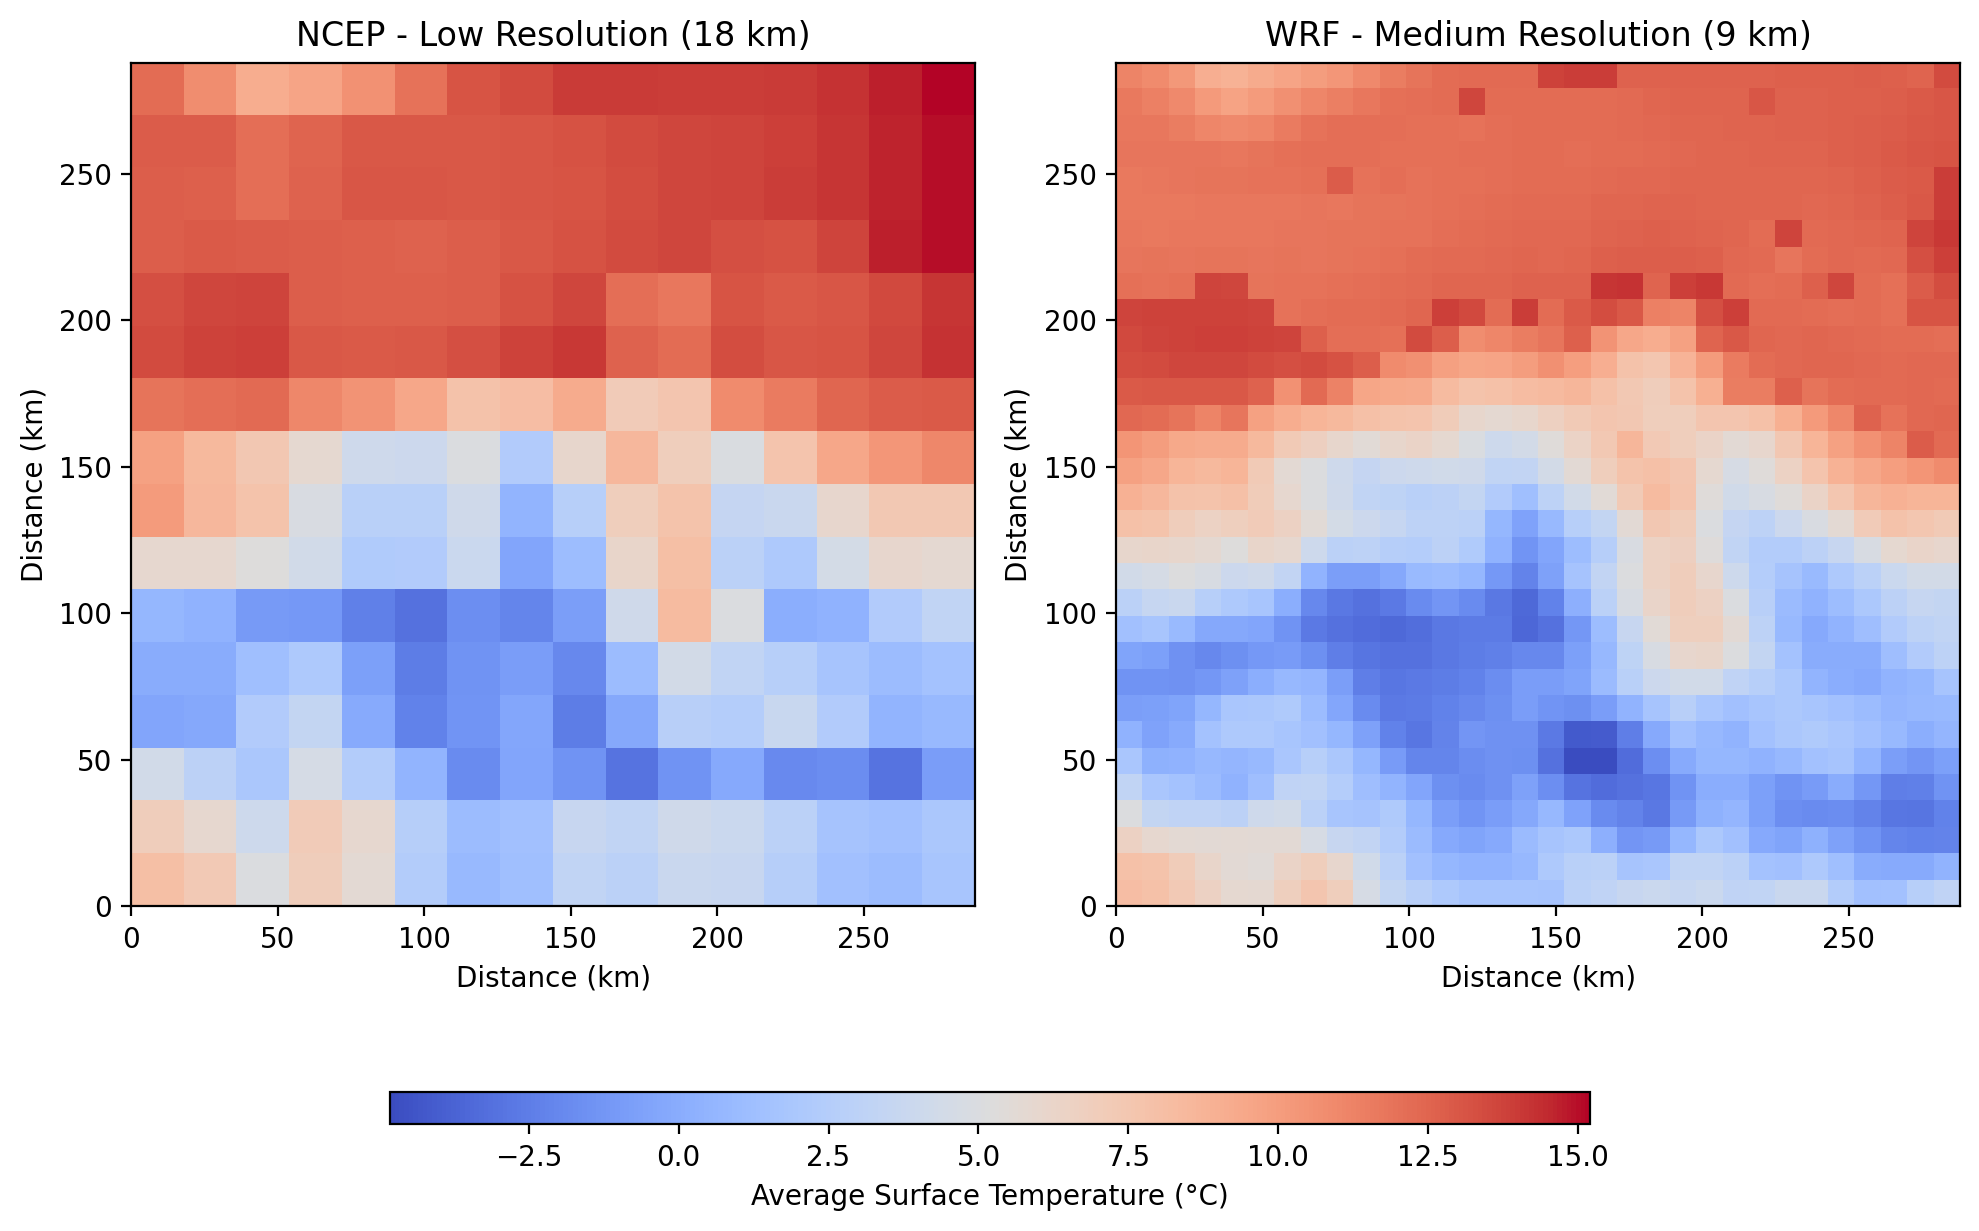

In [6]:
# Create the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 8), dpi=200)

combined_images = np.concatenate((mean_T2m_WRF_9km, mean_T2m_NCEP_near)) - 273.15
vmin, vmax = np.min(combined_images), np.max(combined_images)

cmap = 'coolwarm'

# Plot for 9km
ax2 = axes[1]
im2 = ax2.imshow(mean_T2m_WRF_9km - 273.15, cmap=cmap, extent=[0, area_size, 0, area_size], vmin=vmin, vmax=vmax)
ax2.set_title('WRF - Medium Resolution (9 km)')
ax2.set_xlabel('Distance (km)')
ax2.set_ylabel('Distance (km)')

# Plot for NCEP_down
ax4 = axes[0]
im4 = ax4.imshow(mean_T2m_NCEP_down - 273.15, cmap=cmap, extent=[0, area_size, 0, area_size], vmin=vmin, vmax=vmax)
ax4.set_title('NCEP - Low Resolution (18 km)')
ax4.set_xlabel('Distance (km)')
ax4.set_ylabel('Distance (km)')

# Add a single colorbar for all subplots
cbar = fig.add_axes([0.2, 0.1, 0.6, 0.02])  # Specify the position [left, bottom, width, height] for the colorbar
cbar = fig.colorbar(im4, cax=cbar, orientation='horizontal', label='Average Surface Temperature (°C)')

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

# b) 

Analyzing the so-called baseline distributions is very important because they are later required to compare the performance of the GAN. The GAN increases knowledge for instance if the distribution of its RMSE is shifted towards zero. While that will be assessed later during the project we first want to discuss the baseline distributions. Here, for every point in time the RMSE of the high resultion WRF 3km and medium resolution WRF 9km was calculated with respect to the low resolution NCEP data. This was performed for every variable, i.e. wind in horizontal (U - approximately zonal) and vertical (V - approximately longitudinal) directions and surface temperature (T). Then, for each combination, a histogram was created that sorts all RMSE into bins (in this case 100) and tracks the relative occurance of each bin. According to the law of high numberes, this relative occurence approaches a probability which is why the plots below are show the probability density distribution of the RMSE.

Note, that the plots have a log scale along the y-axis. Principally, all distributions look very similar. They feature a very drastic increase of probability after some RMSE threshold (lowest RMSE) on the left side. Then, a probability peak is reached and the distribution begins to fall again towards higher RMSE. This decrease, however, is considerably slower than the increase before and seems to be approximately linear. On the log scale, this is equivalent to an exponential decay. Consequently, the probability of finding high RMSE decreases exponentially with the RMSE. The biggest difference in the probability distributions is visible between U and V. U seems to have a faster decay towards high RMSE and the long tail is also cut off earlier. A possible reason for that is that zonal winds might be less variable in this region and thus show a high RMSE less frequently. This might be because the domain is zonally largely symmetrical while it shows high variability along the longitues (flat country in the South, high mountains in the North). 

In [7]:
def calculate_rms_error(data, ref):
    squared_error = np.square(data - ref)
    mean_squared_error = np.mean(squared_error, axis=(1,2))
    rms_error = np.sqrt(mean_squared_error)
    return rms_error

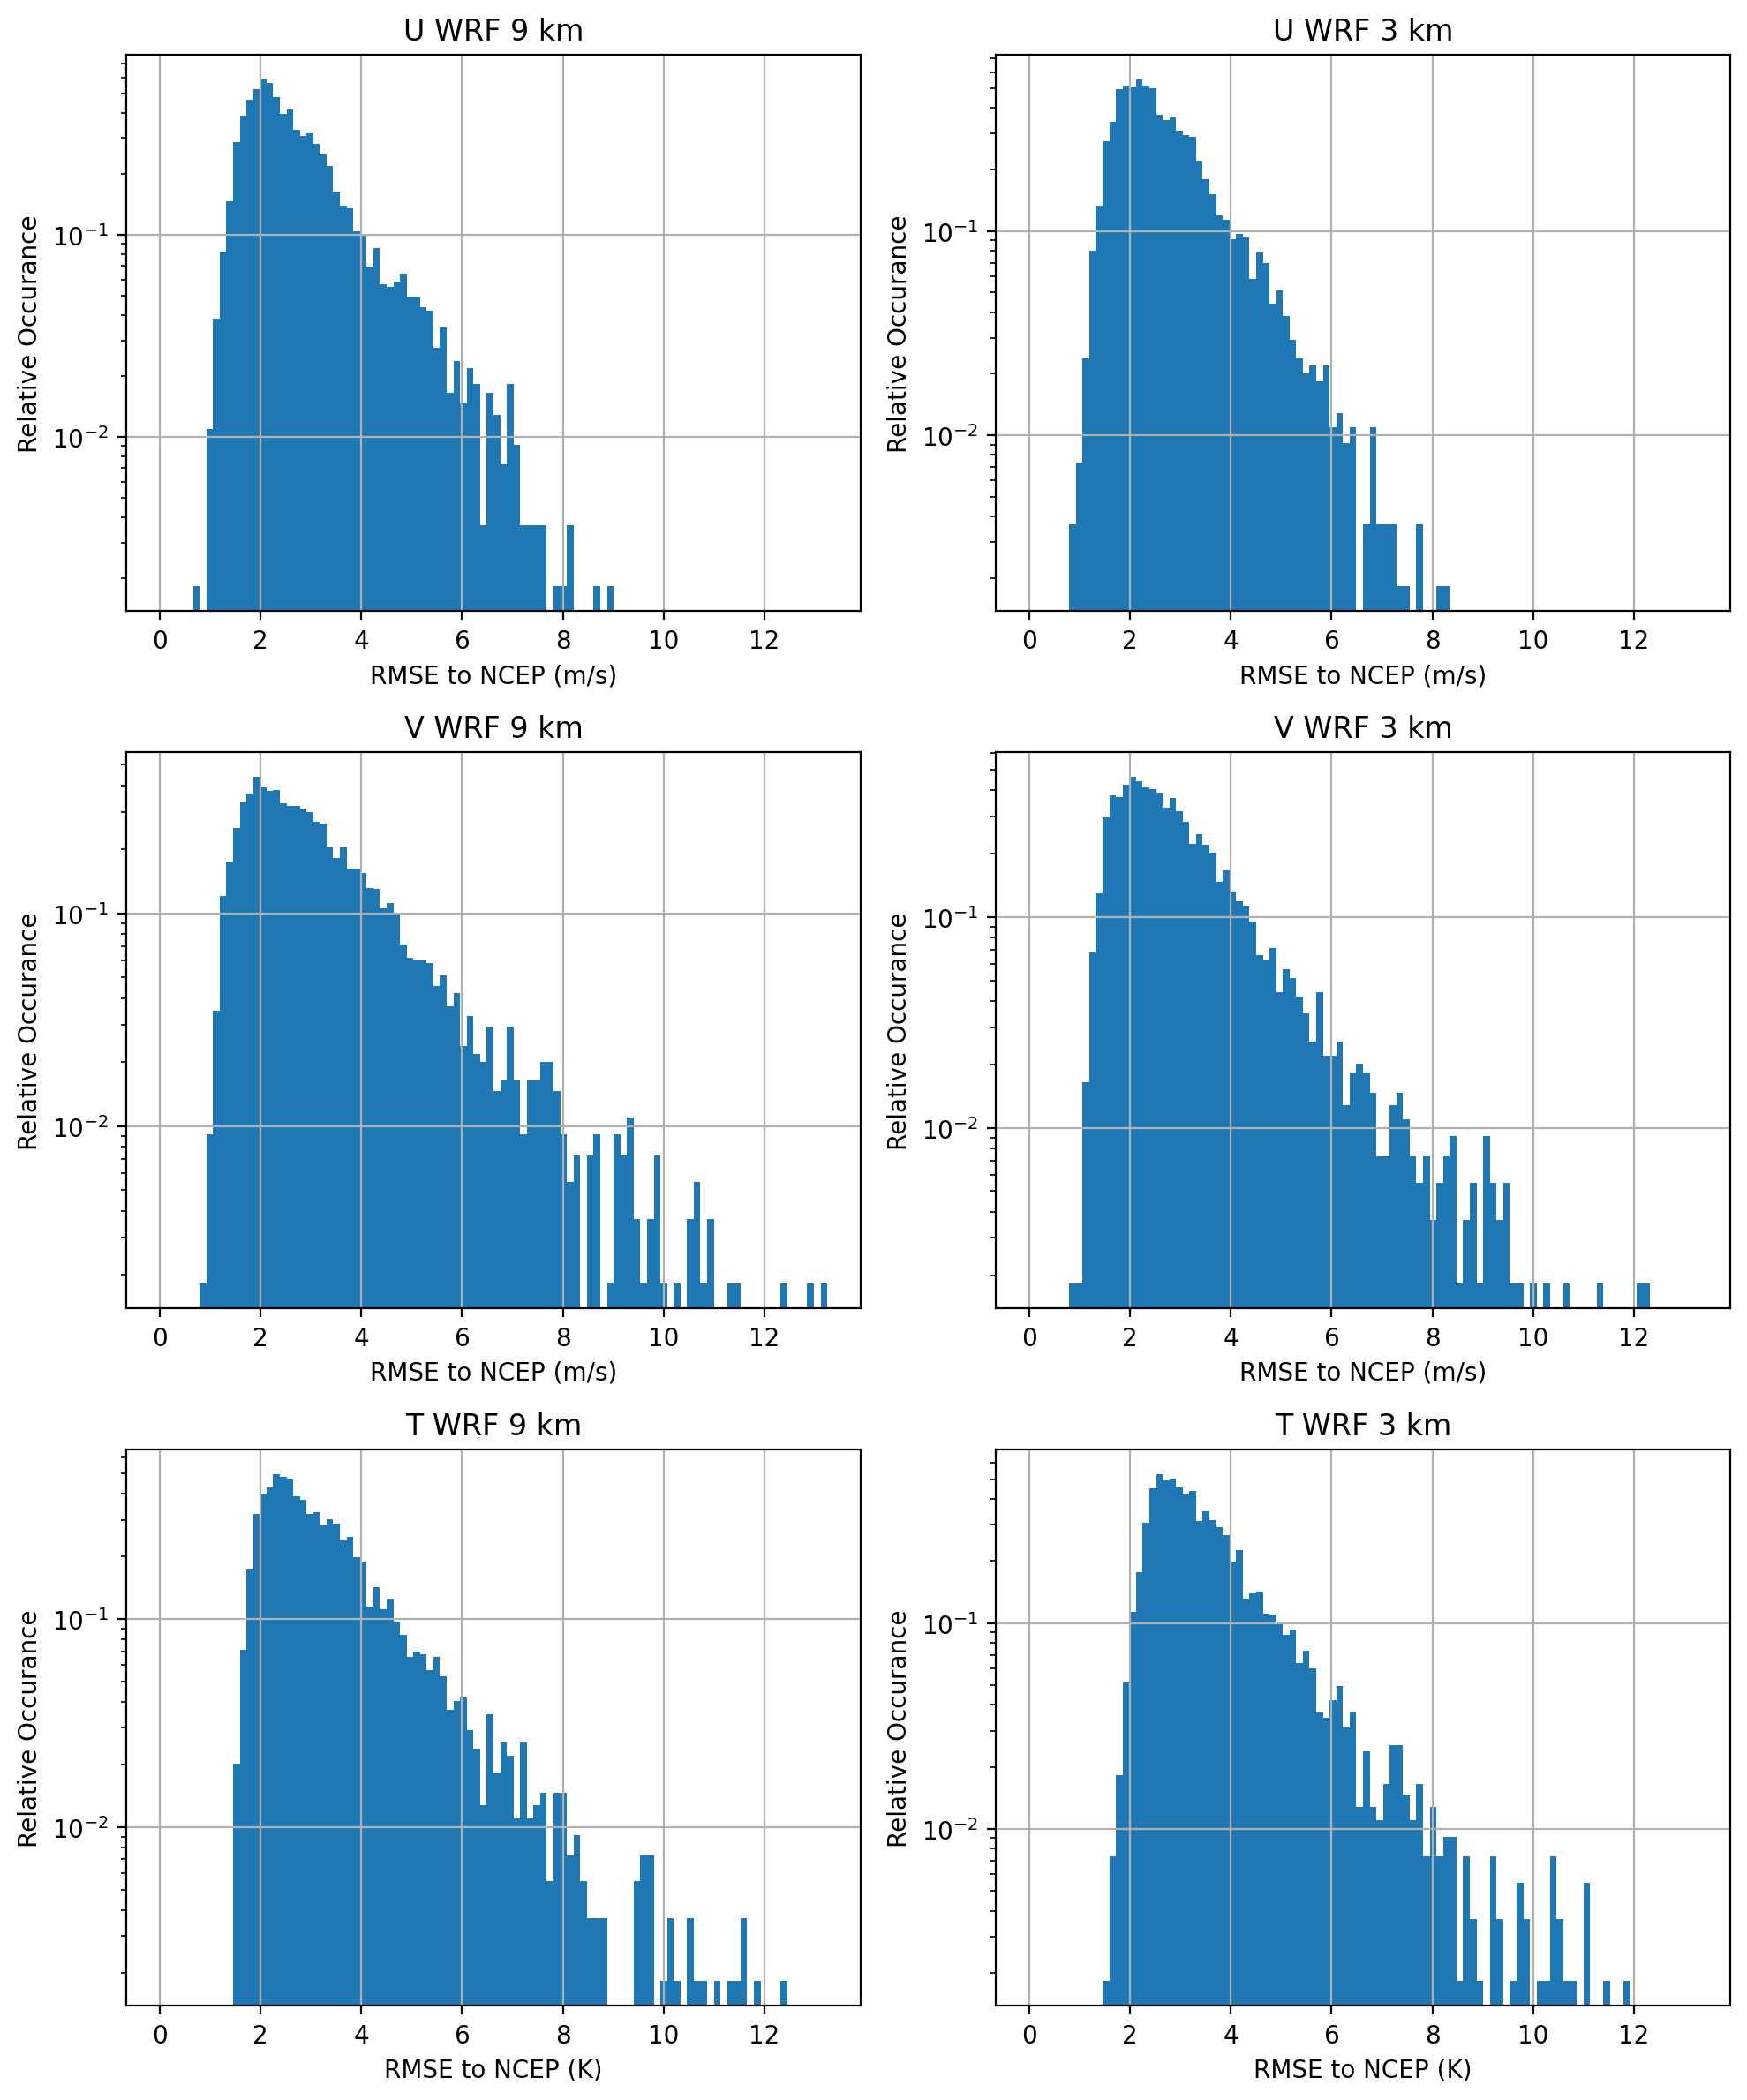

In [8]:
RMSE_pixels_9_NCEP = np.sqrt((mean_T2m_WRF_9km - mean_T2m_NCEP_near)**2).flatten()

# Calculate the RMSE for T2m
T_RMSE_9km = calculate_rms_error(T_WRF_9km, T_NCEP_near)
T_RMSE_3km = calculate_rms_error(T_WRF_3km, T_NCEP_near)

# Calculate the RMSE for V10
V_RMSE_9km = calculate_rms_error(V_WRF_9km, V_NCEP_near)
V_RMSE_3km = calculate_rms_error(V_WRF_3km, V_NCEP_near)

# Calculate the RMSE for U10
U_RMSE_9km = calculate_rms_error(U_WRF_9km, U_NCEP_near)
U_RMSE_3km = calculate_rms_error(U_WRF_3km, U_NCEP_near)


# Create a list of arrays
rmse_arrays = [U_RMSE_9km, U_RMSE_3km, V_RMSE_9km, V_RMSE_3km, T_RMSE_9km, T_RMSE_3km]
arrays_name = ["U WRF 9 km", "U WRF 3 km", "V WRF 9 km", "V WRF 3 km", "T WRF 9 km", "T WRF 3 km"]
units = ['m/s', 'm/s', 'K']

num_bins = 100
bin_range = (0, np.max([np.max(arr) for arr in rmse_arrays]))  # Assuming the range of RMSE values is from 0 to the maximum value across all arrays

# Create a figure with 6 subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 12), dpi=200)

# Iterate over the arrays and plot histograms in subplots
for i, rmse_array in enumerate(rmse_arrays):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    ax.hist(rmse_array, bins=num_bins, range=bin_range, density=True)
    ax.set_xlabel(f'RMSE to NCEP ({units[row]})')
    ax.set_ylabel('Relative Occurance')
    ax.set_title(f'{arrays_name[i]}')
    ax.set_yscale("log")
    ax.grid(True)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

# c)

The training code below is responsible for training a GAN model, which consists of a Generator and a Discriminator. The training is divided into two phases: pre-training the Generator and training the entire GAN.

During pre-training, the Generator is trained separately to generate better initial outputs. The Generator is trained for a specified number of pretrain_epochs. For each epoch, the code iterates over the data in the dataloader and performs the following steps: zero the gradients of the Generator optimizer, generate images using the Generator from low-resolution input, calculate the content loss between the generated images and high-resolution images, backpropagate the content loss and update the Generator's parameters using the optimizer. If the content loss falls below a certain threshold (pre_train_threshold), the pre-training process is stopped.

After pre-training, the GAN training begins. For each epoch, the code iterates over the data in the dataloader. In each iteration, the Discriminator is trained first. The gradients of the Discriminator optimizer are zeroed, real and fake images are passed through the Discriminator, and the Discriminator loss is calculated using the Binary Cross Entropy (BCE) loss. The loss is backpropagated, and the Discriminator's parameters are updated using the optimizer.

Next, the Generator is trained. The gradients of the Generator optimizer are zeroed. Low-resolution images are passed through the Generator to generate fake images. The fake images are then passed through the Discriminator to obtain the fake outputs. The Generator loss is computed as a combination of the content loss (Mean Squared Error) between the high-resolution images and fake images and the adversarial loss, calculated using the BCE loss between the fake outputs and real labels. The relative importance of the adversarial loss is controlled by the hyperparameter alpha. The total loss is backpropagated, and the Generator's parameters are updated.

The code includes a dynamic training scheme. If the Discriminator's loss falls below a certain threshold, the Generator is trained extra times (controlled by gen_count) to improve its performance. Similarly, if the Discriminator's loss exceeds a certain threshold, the Discriminator is trained extra times (controlled by dis_count) to improve its discrimination ability.

Finally, the code returns the recorded losses for both the Generator and Discriminator during training.

The create_dataloader function is a utility function that takes in the input and label data, converts them into PyTorch tensors, and creates a DataLoader for efficient batch processing during training.

The get_required_items function is a utility function that is called during the setup of the GAN training process. It prepares and retrieves the necessary items for training, including the loss functions used for the Discriminator and Generator, as well as the labels for real and fake images. The function allows for optional label smoothing, which can help improve the stability and performance of the GAN training. Overall, get_required_items assists in setting up the training process by providing the essential components required for loss calculation and label assignment.

In [62]:
import torch
from torch import nn, optim
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import torch.nn.functional as F


def get_required_items(batch_size, label_smoothing=False):
    # Binary Cross Entropy (BCE) loss for the discriminator and Mean Squared Error (MSE) for the content loss
    criterion_D = nn.BCELoss()
    criterion_content = nn.MSELoss()

    # Labels for real and fake images with optional label smoothing
    real_labels = torch.full((batch_size, 1), 1 - label_smoothing).float()
    fake_labels = torch.full((batch_size, 1), label_smoothing).float()

    return criterion_D, criterion_content, real_labels, fake_labels


def train_gan(generator, discriminator, pretrain_epochs, epochs, dataloader, g_learning_rate, d_learning_rate, alpha, count_thres, pre_train_threshold, label_smoothing=0):
    criterion_D, criterion_content, real_labels, fake_labels = get_required_items(dataloader.batch_size, label_smoothing)

    # Optimizers (Let's use Adam here)
    optimizer_G = optim.Adam(generator.parameters(), lr=g_learning_rate)
    optimizer_D = optim.Adam(discriminator.parameters(), lr=d_learning_rate)

    gen_loss = []
    dis_loss = []

    # Pre-training Generator
    class BreakLoops(Exception):
        pass

    try:
        for epoch in range(pretrain_epochs):
            for i, data in enumerate(dataloader):
                low_res_images, high_res_images = data
                optimizer_G.zero_grad()
                generated_images = generator(low_res_images)
                content_loss = criterion_content(high_res_images, generated_images)

                print(f'pretraining: {epoch}: batch {i}: Gen: {content_loss.item():.{4}}', end='\r')
                # Backprop and optimize
                content_loss.backward()
                optimizer_G.step()

                if content_loss.item() < pre_train_threshold:
                    raise BreakLoops
    except BreakLoops:
        print("\nPre-training ended")

    # Training GAN
    for epoch in range(epochs):
        for i, data in enumerate(dataloader):
            low_res_images, high_res_images = data

            # Training Discriminator
            optimizer_D.zero_grad()

            real_outputs = discriminator(high_res_images)
            fake_images = generator(low_res_images)
            fake_outputs = discriminator(fake_images.detach())

            d_loss_real = criterion_D(real_outputs, real_labels)
            d_loss_fake = criterion_D(fake_outputs, fake_labels)
            d_loss = d_loss_real + d_loss_fake
            dis_loss.append(d_loss.item())
            d_loss.backward()
            optimizer_D.step()

            # Training Generator
            optimizer_G.zero_grad()

            fake_images = generator(low_res_images)
            fake_outputs = discriminator(fake_images)

            

            adversarial_loss = criterion_D(fake_outputs, real_labels)
            content_loss = criterion_content(high_res_images, fake_images)
            g_loss = content_loss + alpha * adversarial_loss
            gen_loss.append(g_loss.item())
            print(f'training {epoch}: batch {i}: Gen: {g_loss.item():.{4}}, Dis: {d_loss.item():.{4}}', end='\r')

            g_loss.backward()
            optimizer_G.step()

            # dynamic training
            gen_count = 1
            while (d_loss.item() < 0.460) and gen_count < count_thres:
                # Discriminator did too well -> train the generator extra
                optimizer_G.zero_grad()
                fake_images = generator(low_res_images)
                fake_outputs = discriminator(fake_images)
                adversarial_loss = criterion_D(fake_outputs, real_labels)
                content_loss = criterion_content(high_res_images, fake_images)
                g_loss = content_loss + alpha * adversarial_loss
                g_loss.backward()
                optimizer_G.step()
                gen_count += 1

            dis_count = 1
            while (d_loss.item() > 0.6) and dis_count < count_thres:
                # Generator fooled the discriminator -> train the discriminator extra
                optimizer_D.zero_grad()
                real_outputs = discriminator(high_res_images)
                fake_images = generator(low_res_images)
                fake_outputs = discriminator(fake_images.detach())
                d_loss_real = criterion_D(real_outputs, real_labels)
                d_loss_fake = criterion_D(fake_outputs, fake_labels)
                d_loss = d_loss_real + d_loss_fake
                d_loss.backward()
                optimizer_D.step()
                dis_count += 1

    return gen_loss, dis_loss

def create_dataloader(label, input, batch_size):
    # Convert the numpy arrays to PyTorch tensors and create a DataLoader
    high_res = torch.tensor(label).unsqueeze(1).float()
    low_res = torch.tensor(input).unsqueeze(1).float()
    dataset = TensorDataset(low_res, high_res)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)
    return dataloader

The code below includes two modules: the Generator and the Discriminator. The Generator is responsible for generating new images, while the Discriminator aims to distinguish between real and generated images.

The Generator starts with a deconvolution layer (self.conv1) that increases the resolution of the input. It is followed by a series of iterations in which a convolution layer (self.conv2) is applied to the output of the previous iteration and added to the previous output using a skip connection. This iterative process allows the network to capture more global and abstract features while not neglecting local characteristics. The final output is generated by a convolution layer (self.conv_out) that maps the output channels to a single-channel image.

On the other hand, the Discriminator takes an input image and applies several convolution layers (self.conv1, self.conv2, self.conv3) to extract features at different levels of abstraction. The activations are then passed through leaky ReLU activation functions (self.activation) and batch normalization layers (self.norm1, self.norm2) for stability and faster training. The feature map is flattened and passed through a fully connected layer (self.fc) to obtain a scalar value. This value is then squashed between 0 and 1 using a sigmoid activation function (self.out), representing the probability of the input image being real.

Overall, the Generator and Discriminator work together in a GAN framework, with the Generator generating realistic images and the Discriminator providing feedback to train the Generator to improve its image generation capabilities.

In [64]:
# adjusted

# Stacking multiple layers of small kernel size convolutions can effectively behave as a larger receptive field, allowing the network to capture more global and abstract features.
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        self.conv1 = nn.ConvTranspose2d(1, 64, kernel_size=4, stride=2, padding=1)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.conv_out = nn.Conv2d(64, 1, kernel_size=3, stride=1, padding=1)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        
        for i in range(16):
            # adding skip connection befor passing to activation function
            x = self.conv2(x) + x
            x = F.relu(x)
            
        out = self.conv_out(x)

        return out


class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
       
        self.activation = nn.LeakyReLU(0.2)
        self.norm1 = nn.BatchNorm2d(64)
        self.norm2 = nn.BatchNorm2d(128)
       
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(256*32*32, 1)  
 
        self.out = nn.Sigmoid()
       
    def forward(self, x):
        x = self.activation(self.norm1(self.conv1(x)))
        x = self.activation(self.norm2(self.conv2(x)))
        x = self.activation(self.conv3(x))
        x = self.flatten(x)
        x = self.fc(x)
        x = self.out(x)

        return x

Now, we have all the prerequisites to define and train our GAN. Below, the different hyperparameters are defined. During training, it became clear that one epoch takes around 25 minutes to compute with the resources at hand. Therefore, a systematic optimization as performed in the last homeworks and project was not feasible. This is especially true since a multitude of parameters had to be set which would let the number of individual trial runs explode if one where to try every different combination. Nevertheless, different parameter settings were tested and the 'best' parameters were chosen as below. Let us discuss them in more detail.

First, the pretraining has some unique hyperparameters, namely the number of epochs in the pretraining and the threshold. The latter defines a value that triggers the end of the pretraining once the generator loss has reached that limit in one batch. The number of epochs in the pretraining was therefore set to be relatively high as the threshold should be met before the actual training of the GAN begins. Why the pretrain threshold was chosen to be exactly 100 will become clear when looking at the behaviour of the GAN during training.

Typically, with all tested hyperparamter combinations, the generator loss does not get below values in the order of 1 to 10. Furthermore, if the learning rate of the discriminator is such that the discriminator learns (which is not the case if the learning rate is too high), the discriminator loss is difficult to contain in a range around 0.5 as it is decreasing continuously. While other possibilities to tackle this are described later, one option is to decrease the learning rate of the discriminator such that the generator has enough time to learn before the discriminator gets too good. This is why the learning rate of the discriminator was chosen 3 orders of magnitude lower than the learning rate of the generator. Due to the low learning rate of the discriminator, it also needs some time to get to a range around 0.5 in the first place. By setting the pre-train threshold to 100, the generator can improve to its typical loss range of around 10 more or less on its own before the discriminator is ready to improve the training quality. Other learning rates of the generator were tested and did not solve the problem of the limited loss reduction for the generator as will be discussed in detail later.

While the training was performed for 15 epochs, which took around 6h, the generator loss did not decrease further and always stayed above 1. Consequently, training the GAN  more epochs does not seem to improve results. However, it has to be kept in mind that the discriminator loss is decreasing constantly, increasing the generator loss through the adversarial loss and the hyperparameter alpha. This parameter was chosen relatively high compared to the Stengel et al. (2020) paper to utilize exactly this. With more computational ressources, it might thus be a good idea to run the training for more epochs and also run a systematic optimization for alpha.

Lastly, as promised, the training setup incorporates mechanisms that can potentially tackle the problem of the ever decreasing discriminator loss outside of its intended range. One is called 'dynamic training' and is part of the training function. Here, if the discriminator loss is too high, the discriminator is trained additionally to the normal training procedure so that it can catch up with the generator. Moreover, even more importantly, if the discriminator loss is too low, the generator is trained extra. The maximum amount of times this extra training is performed is set by count_thres and is in this case set rather low. Higher values increased computation time significantly while not offering substantial improvements to the decreasing discriminator loss problem. This is probably also connected to the batch size which was set to 1 here. Consequently, there is only limited improvements one element of the GAN can make based on only one temperature map pair and multiple steps only on this batch offer limited improvements. While a higher batch size could possibly improve this issue, it also dramatically decreases the number of steps the GAN can perform in one epoch and was thus not seen to be benefitial to our situation with limited computational ressources. 

Note that, next to the hyperparameters the GAN structure, i.e. the set up of generator and discriminator, also leaves room for possible optimization. While their construction is sensible and tailored to our problem set as described earlier, other model structures are thinkable, too. In fact, other generator and discriminator definitions without skip layers, with less convolution layers or layers with other kernel sizes have been tested but neither of them seemed to perform as good as the ones chosen in the end.

The described problems of the development of generator and discriminator loss are also discussed in the next paragraph, where a systematic test of the learning rate hyperparameters was performed.

In [ ]:
input = T_WRF_9km_down
labels = T_NCEP_down

pretrain_epochs = 100 # can be high because of pre_train_threshold
pre_train_threshold = 100

epochs = 15
batch_size = 1
g_learning_rate = 1e-4
d_learning_rate = 5e-7
alpha = 0.05

count_thres = 2
l_smoothing = 0

# Convert the numpy arrays to PyTorch tensors and create a DataLoader
dataloader = create_dataloader(input, labels, batch_size)

# Instantiate the generator and the discriminator
generator = Generator()
discriminator = Discriminator()


loss = train_gan(generator, discriminator, 
        pretrain_epochs, epochs, 
        dataloader, g_learning_rate, d_learning_rate,
        alpha, count_thres, 
        pre_train_threshold, label_smoothing=l_smoothing)

# save trained GAN
torch.save(generator.state_dict(), 'generator.pth')
torch.save(discriminator.state_dict(), 'discriminator.pth')

Here, a systematic test of learning rate hyperparameter for generator and discriminator was performed to see if one combination can produce discriminator losses around 0.5 and decreasing generator losses. This is our target because we want the generator to become better in downscaling and the discriminator to not be too good. Due to limited ressources, this learning rate test was limited to two epochs, the other hyperparameters were kept similar to the chosen hyperparameters above. The resulting generator and discriminator loss are plotted in the big figures below. It is evident, that in no combination, the generator loss manages to break below 1. Depending on its learning rate, however, the area of a loss of around 10 is reached faster (higher $\eta_G$) or slower (lower $\eta_G$). Similarly, as mentioned before, a lower learning rate for the discriminator keeps slows down its learning and thus keeps it in its designated range for longer. Note, that this analysis is by far not enough to determine optimal hyperparameters as there are more significant parameters to optimize as described above.

In [ ]:
# find best parameters:
input = T_WRF_9km_down
labels = T_NCEP_down
pretrain_epochs = 10 # can be high because of pre_train_threshold
epochs = 2
batch_size = 1
alpha = 0.05
count_thres = 2
pre_train_threshold = 30
l_smoothing = 0

# Convert the numpy arrays to PyTorch tensors and create a DataLoader
dataloader = create_dataloader(input, labels, batch_size)

g_learning_rates = [1e-3, 1e-4, 1e-5, 1e-6]
d_learning_rates = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8]
discriminator_losses = []
generator_losses = []

for g_learning_rate in g_learning_rates:
    for d_learning_rate in d_learning_rates:
        
        generator = Generator()
        discriminator = Discriminator()

        discriminator_loss, generator_loss = train_gan(generator, discriminator, 
                pretrain_epochs, epochs, 
                dataloader, g_learning_rate, d_learning_rate,
                alpha, count_thres, 
                pre_train_threshold, label_smoothing=l_smoothing)
        
        discriminator_losses.append(discriminator_loss)
        generator_losses.append(generator_loss)

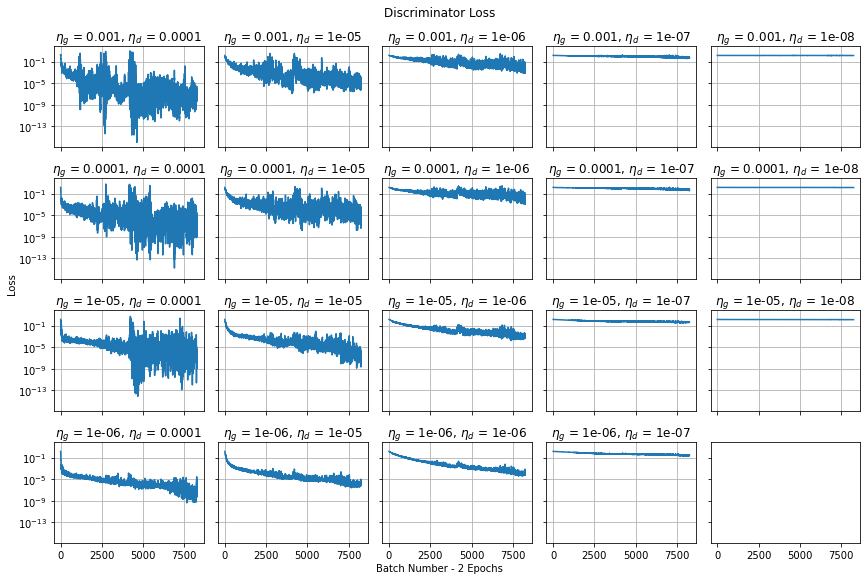

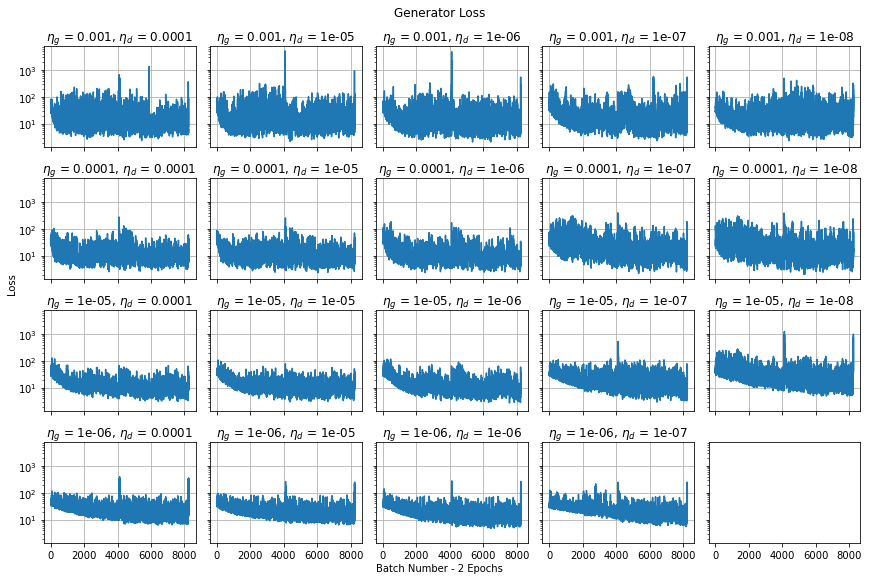

In [102]:
import matplotlib.pyplot as plt

# Create the figure for Generator losses
fig_gen, axes_gen = plt.subplots(len(g_learning_rates), len(d_learning_rates), figsize=(12, 8), sharex=True, sharey=True)
fig_gen.suptitle("Discriminator Loss")

# Iterate over the generator and discriminator losses
for idx, (g, d) in enumerate(zip(generator_losses, discriminator_losses)):
    g_idx = idx // len(d_learning_rates)
    d_idx = idx % len(d_learning_rates)
    g_lr = g_learning_rates[g_idx]
    d_lr = d_learning_rates[d_idx]

    # Plot the generator loss
    ax = axes_gen[g_idx, d_idx]
    ax.plot(g, alpha=1)
    ax.set_title(f'$\eta_g$ = {g_lr}, $\eta_d$ = {d_lr}')
    ax.set_yscale('log')
    ax.grid(True)

# Set y-label on the left side
fig_gen.text(0, 0.5, 'Loss', va='center', rotation='vertical')

# Set x-label at the bottom
fig_gen.text(0.5, 0, 'Batch Number - 2 Epochs', ha='center')

plt.tight_layout()
plt.show()

# Create the figure for Discriminator losses
fig_dis, axes_dis = plt.subplots(len(g_learning_rates), len(d_learning_rates), figsize=(12, 8), sharex=True, sharey=True)
fig_dis.suptitle("Generator Loss")

# Iterate over the generator and discriminator losses
for idx, (g, d) in enumerate(zip(generator_losses, discriminator_losses)):
    g_idx = idx // len(d_learning_rates)
    d_idx = idx % len(d_learning_rates)
    g_lr = g_learning_rates[g_idx]
    d_lr = d_learning_rates[d_idx]

    # Plot the discriminator loss
    ax = axes_dis[g_idx, d_idx]
    ax.plot(d)
    ax.set_title(f'$\eta_g$ = {g_lr}, $\eta_d$ = {d_lr}')
    ax.set_yscale('log')
    ax.grid(True)

# Set y-label on the left side
fig_dis.text(0.0, 0.5, 'Loss', va='center', rotation='vertical')

# Set x-label at the bottom
fig_dis.text(0.5, 0.0, 'Batch Number - 2 Epochs', ha='center')

plt.tight_layout()
plt.show()


# d)

Now back to our GAN that was trained for 15 epochs. Let's load the weights and see how the generator performs on the test data.

In [117]:
# load trained GAN
generator = Generator()
discriminator = Discriminator()

generator.load_state_dict(torch.load('generator.pth'))
discriminator.load_state_dict(torch.load('discriminator.pth'));

In [118]:
# Test GAN on test data
low_res_test = torch.tensor(T_NCEP_test_down).unsqueeze(1).float()  # Shape becomes [time, 1, height, width]
high_res_test = torch.tensor(T_WRF_9km_test_down).unsqueeze(1).float()  # Shape becomes [time, 1, height, width]

with torch.no_grad():
    generated_images = generator(low_res_test)

Before we look at the actual images created by the generator, let's quantify its performance by once again calculating the RMSE to the MR WRF data for every image and plotting a histogram to get the probability density distribution. This is shown in the graph below, with the baseline distribution from b) plotted to simplify comparison. It can be seen that the performance of the GAN clearly surpasses the baseline results. The distribution begins at lower RMSE which implies an improvement even of the best estimates. Furthermore, the long tail of the baseline distribution now shows a significantly faster decay for the GAN. The bad or difficult estimates are thus downscaled better with the GAN. Overall, it can be said that the distribution has been squeezed and moved towards lower RMSE. This clearly portraits the capabilities of the GAN to downscale to MR with information gain. 

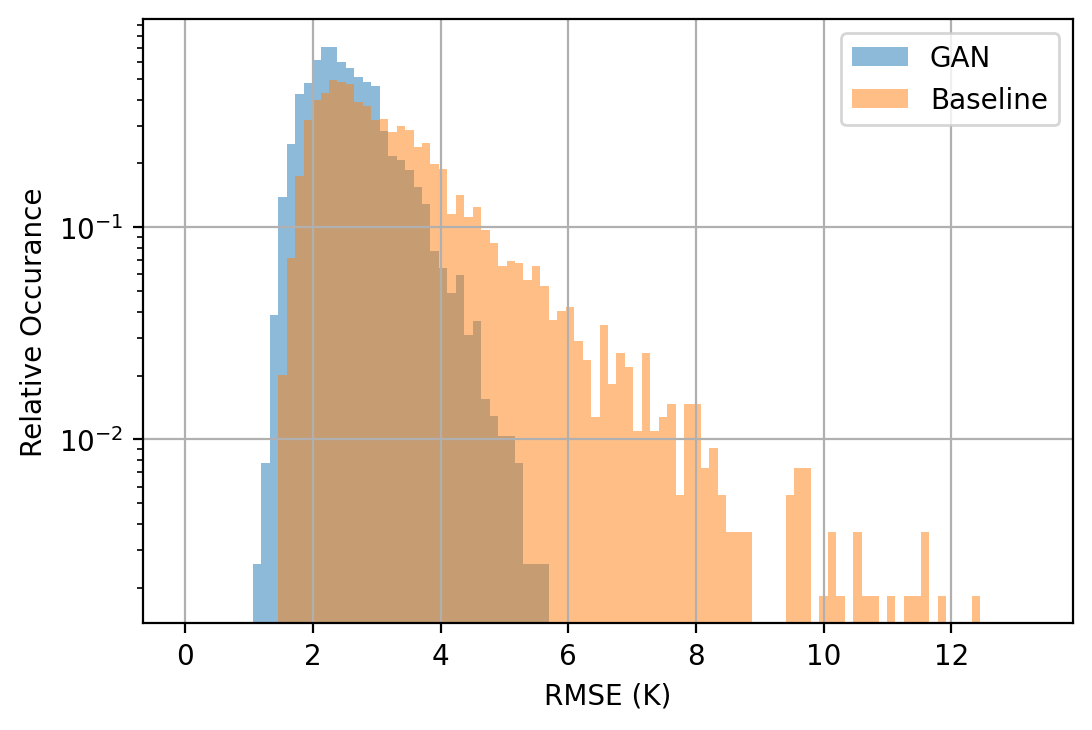

In [105]:
gen_imgs_np = generated_images.squeeze(1).numpy()
lr_imgs_np = T_NCEP_test_down
hr_imgs_np = T_WRF_9km_test_down

RMSE_GAN = calculate_rms_error(gen_imgs_np, hr_imgs_np)

plt.figure(dpi=200)
plt.hist(RMSE_GAN, bins=num_bins, range=bin_range, density=True, alpha=0.5, label="GAN")
plt.hist(T_RMSE_9km, bins=num_bins, range=bin_range, density=True, alpha=0.5, label="Baseline")
plt.xlabel('RMSE (K)')
plt.ylabel('Relative Occurance')
plt.yscale("log")
plt.legend()
plt.grid(True)

Now, let us look at the actual downscaled temperature maps the trained generator produces and compare them to the low resolution, which serves as the input to the generator, and the medium resolution representing the target. Three downscaled temperature patterns with the lowest RMSE are plotted in the figures below.

Unsurprisingly, as these are the best images from the generator and therefore definitely cherry-picked, the downscaled images resemble their target relatively well. The overall pattern is captured satisfyingly. It must be noted, however, that the generator has problems capturing the extremes very well and seems to play it safe most of the time. Consequently, the highest and the lowest temperatures are not represented in their full extend. In particular, the three very cold spots in the lower half of the image are never as dark blue (low temperature) in the generated image as they are in the target. This is probably a result of the training, in particular the definition of the generator loss function. The latter is largely dominated by the content loss which is basically a MSE. The MSE has the characteristic of punishing big errors quadratically more than small errors and thus forgives a lot of small differences more than few big differences. Consequently, the generator is trained to not be as bold in predicting extremes as this imposes the risk of being dramatically wrong. Similarly, presumably for the same reason, the generated images tend to have more smooth temperature profiles with lower spatial gradients. One loss function that could potentially help in capturing temperature extremes and sharper gradients is using Mean Absolute Error (MAE). Here, all errors are treated equally. MAE is less sensitive to outliers and extreme values because it does not square the differences. Therefore, the generator might be more likely to predict extreme values correctly if this loss function was used.

Another striking feature in the generated temperature maps are artifacts that are most visible in the upper part of the images, where certain patterns are repeatedly visible. While this does not cause high errors (see error map below), they make it directly obvious to the human eye that the map is not directly coming from observations. Most certainly, these patterns are a result of the convolution layers with a kernel size of 3 that are applied consecutively in the generator. While this could be tackled by altering the GAN architechture, another option would be using post-processing techniques. They could help smooth out the artifacts to make the prediction be more robust. Care must be taken to not to lose details in the prediction though.

Lastly, the generator has problems representing the warm tongue reaching from the top to the bottom of the image well. This could once again be attributable to the generator creating lower spatial gradients. These gradients might not be big enough to represent such a local feature to its full extent.

In [120]:
def get_smallest_values(array, k):
    indices = np.argpartition(array, k)[:k]
    values = array[indices]
    sorted_indices = indices[np.argsort(values)]
    sorted_values = values[np.argsort(values)]
    return sorted_values, sorted_indices

RMSEs, idxs = get_smallest_values(RMSE_GAN, 3)

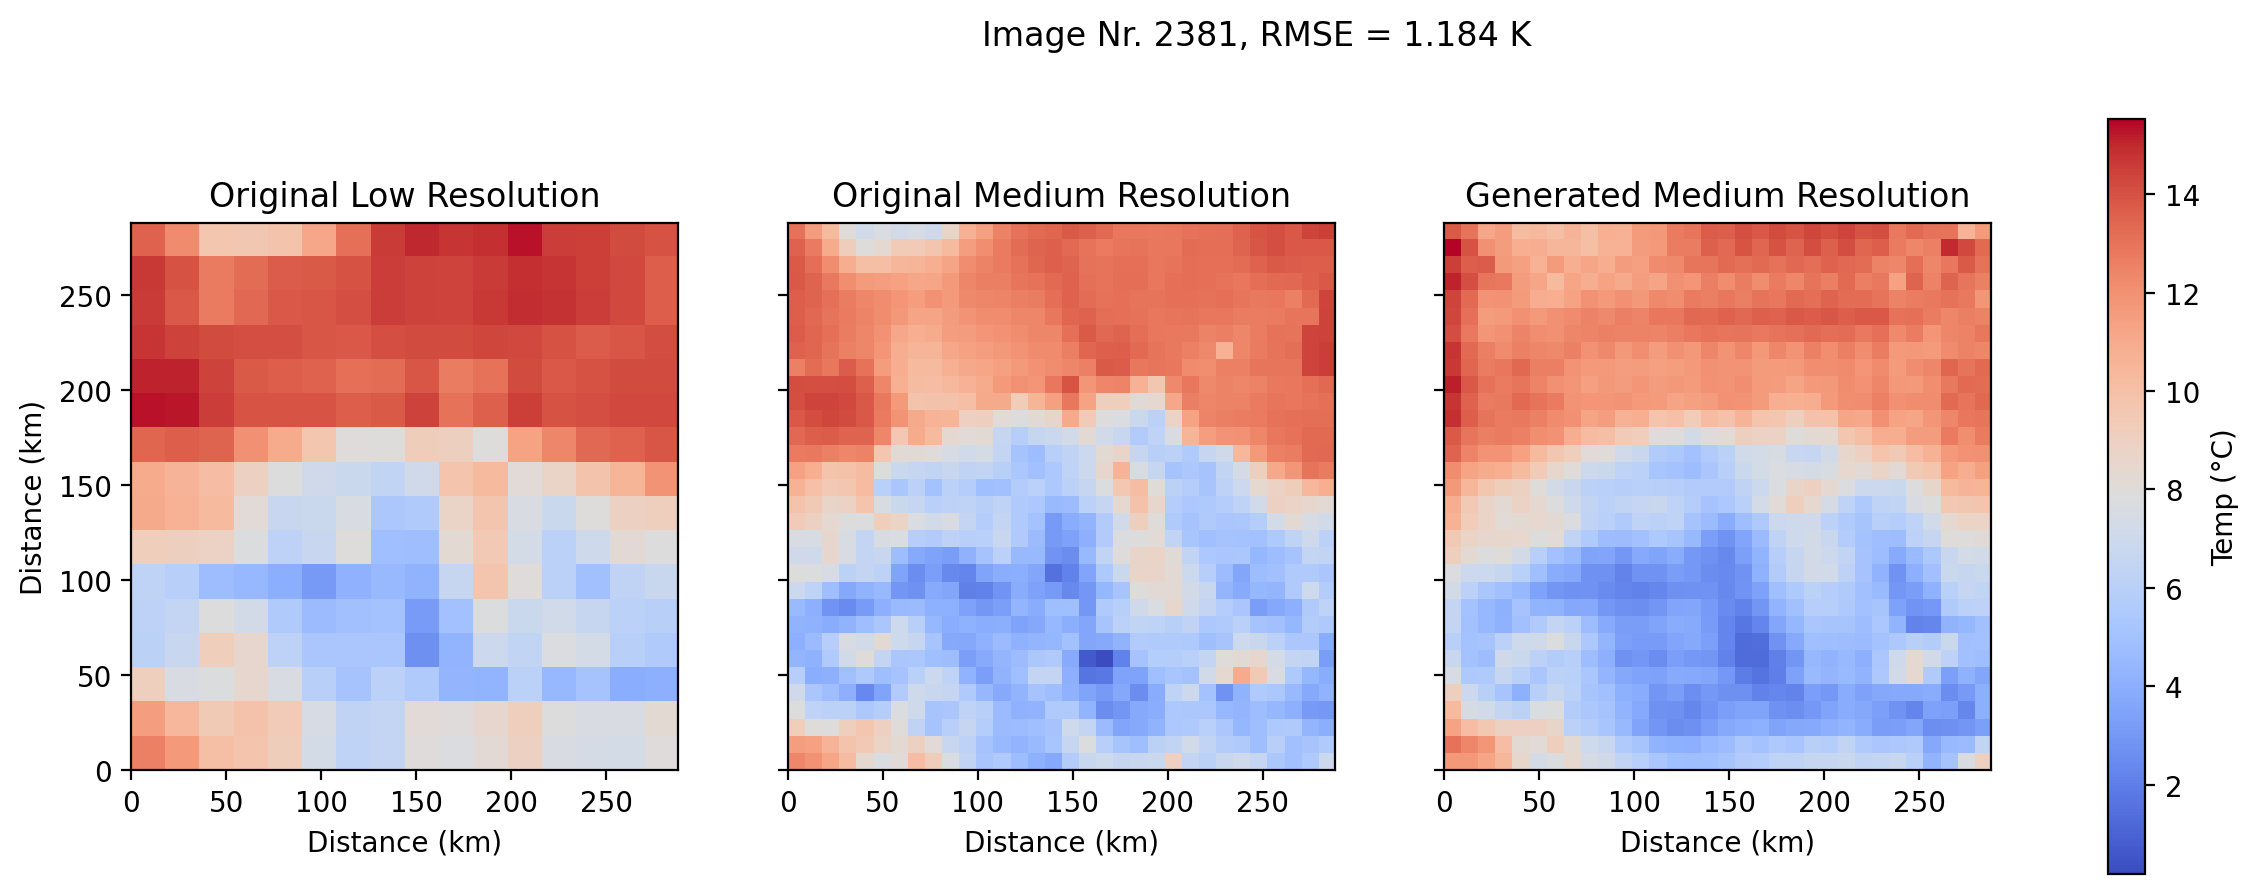

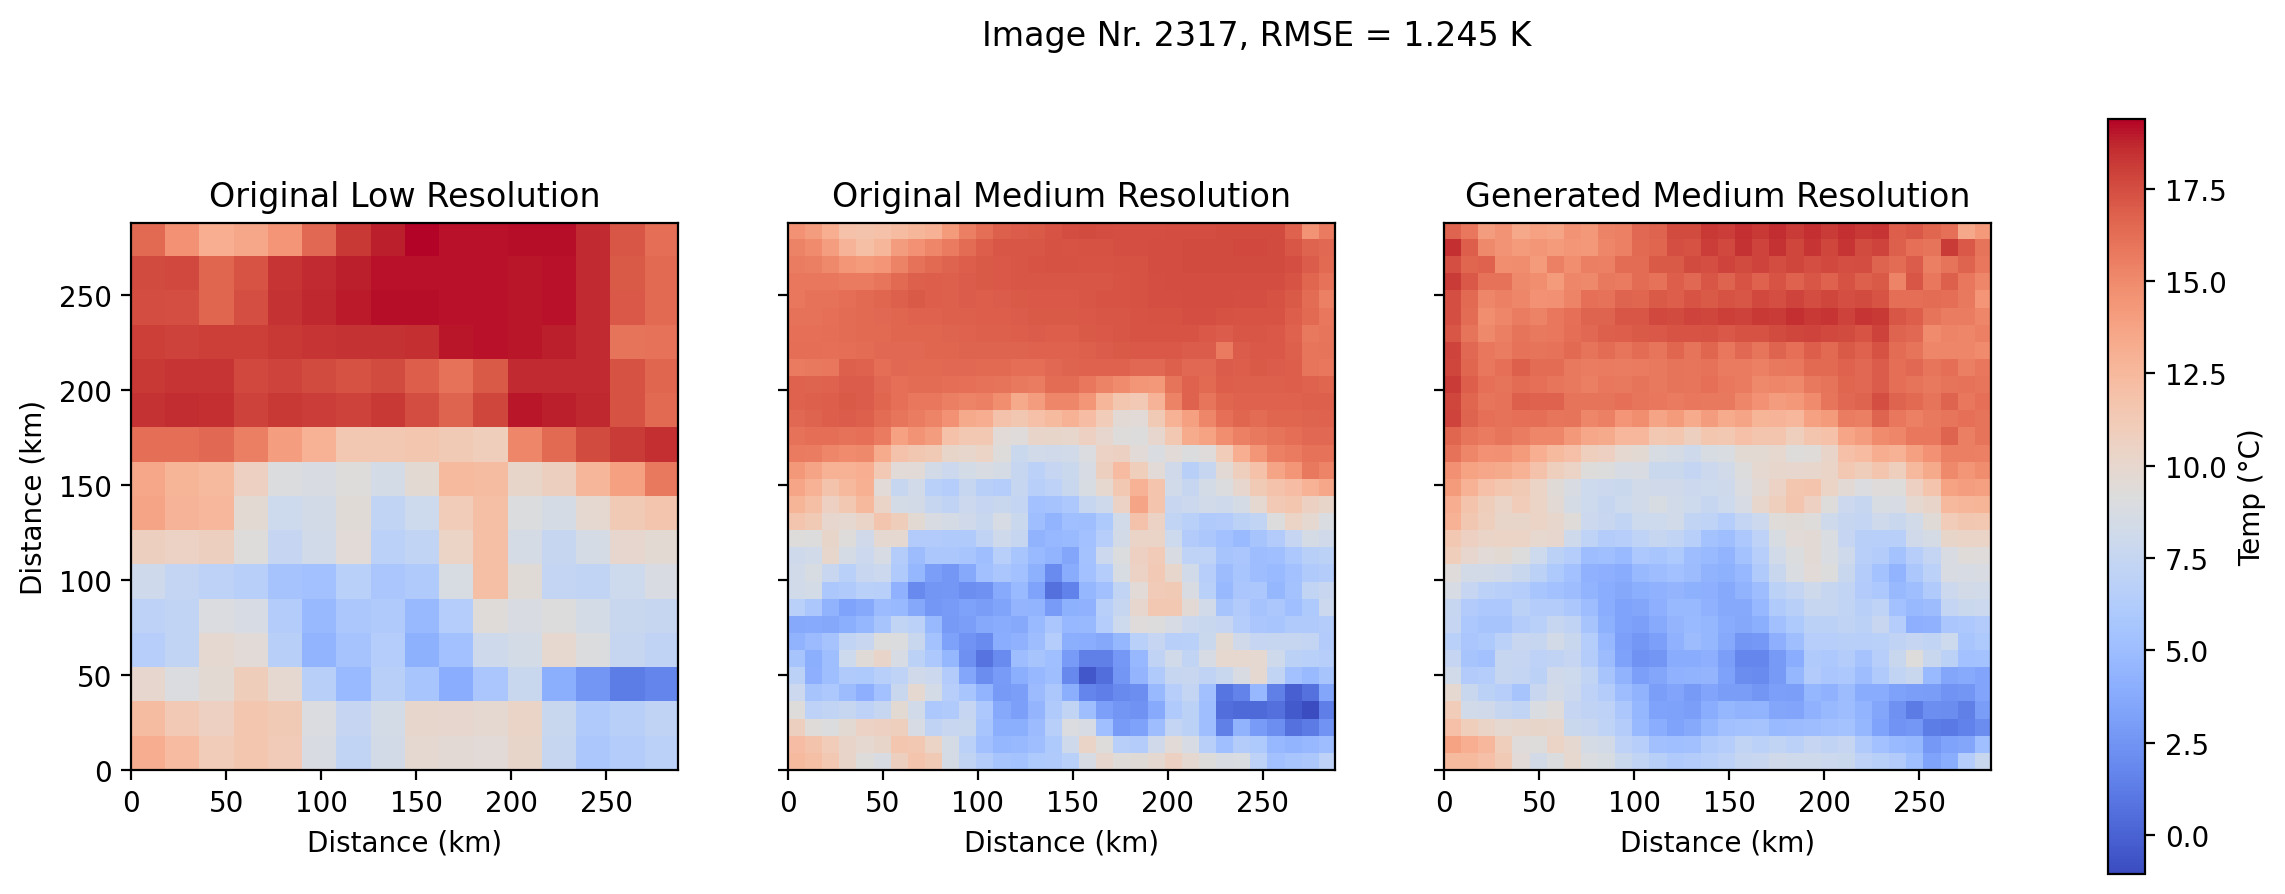

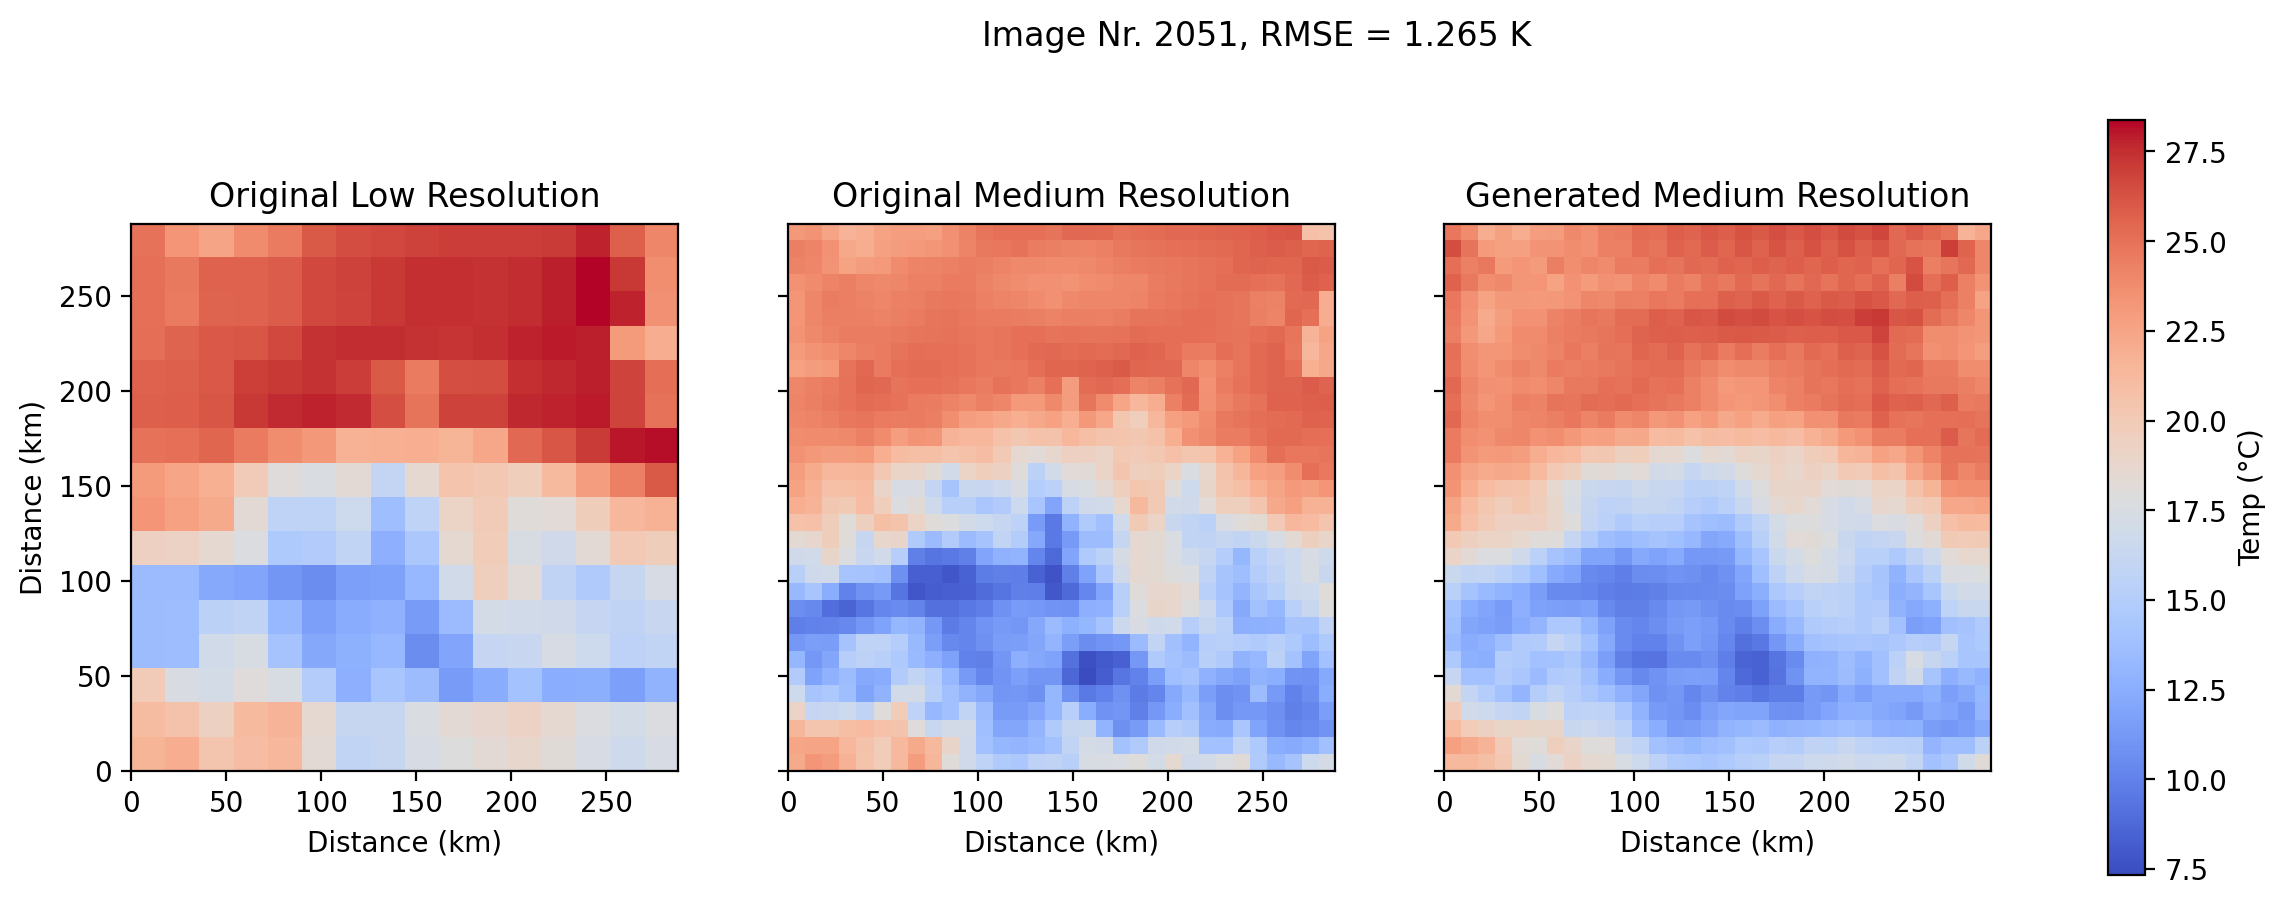

In [163]:
cmap = 'coolwarm'  # Define the colormap to use

for i, idx in enumerate(idxs):
    vmin = np.min([lr_imgs_np[idx].min(), hr_imgs_np[idx].min(), gen_imgs_np[idx].min()]) - 273.15
    vmax = np.max([lr_imgs_np[idx].max(), hr_imgs_np[idx].max(), gen_imgs_np[idx].max()]) - 273.15

    # Plot the images
    fig, axs = plt.subplots(1, 3, figsize=(15, 5), dpi=200, sharey=True)  # Create a figure with 3 subplots

    # Plot the original low resolution image
    im1 = axs[0].imshow(lr_imgs_np[idx] - 273.15, cmap=cmap, vmin=vmin, vmax=vmax, extent=[0, area_size, 0, area_size])
    axs[0].set_title('Original Low Resolution')
    axs[0].set_xlabel('Distance (km)')
    axs[0].set_ylabel('Distance (km)')

    # Plot the original high resolution image
    im2 = axs[1].imshow(hr_imgs_np[idx] - 273.15, cmap=cmap, vmin=vmin, vmax=vmax, extent=[0, area_size, 0, area_size])
    axs[1].set_title('Original Medium Resolution')
    axs[1].set_xlabel('Distance (km)')

    # Plot the generated high resolution image
    im3 = axs[2].imshow(gen_imgs_np[idx] - 273.15, cmap=cmap, vmin=vmin, vmax=vmax, extent=[0, area_size, 0, area_size])
    axs[2].set_title('Generated Medium Resolution')
    axs[2].set_xlabel('Distance (km)')

    # Create a colorbar
    cbar= fig.colorbar(im1, ax=axs, location='right')
    cbar.set_label('Temp (°C)')

    plt.suptitle(f'Image Nr. {idx}, RMSE = {RMSEs[i]:.{4}} K')

    plt.show()

Here, the square root of the quadratic error is plotted as a spatial map. Most regions are white or light gray and thus have an error of less than 1. Only few locally bounded regions have higher errors up to approximately 4 K. 

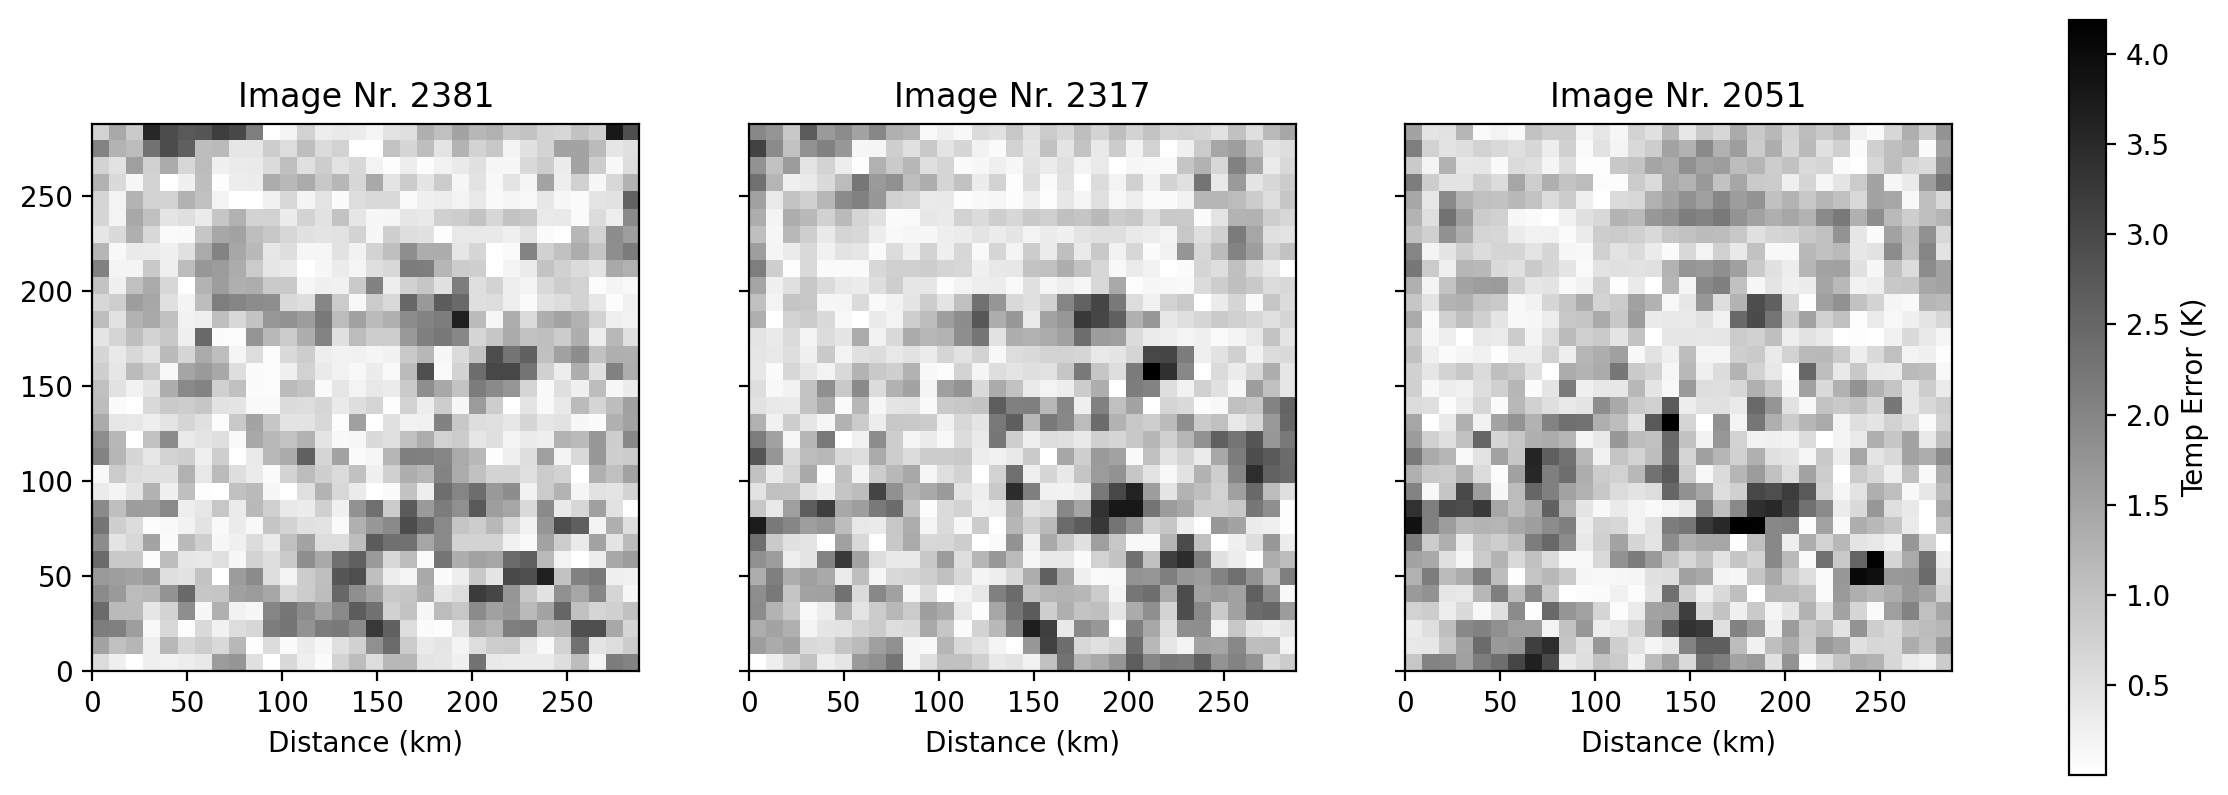

In [156]:
cmap = 'gray_r'  # Define the colormap to use

# Plot the images
fig, axs = plt.subplots(1, 3, figsize=(15, 5), dpi=200, sharey=True)  # Create a figure with 3 subplots

quad_errs = []
for i in idxs:
    quad_err = np.sqrt((gen_imgs_np[i] - hr_imgs_np[i])**2)
    quad_errs.append(quad_err)

vmin = np.min(quad_errs)
vmax = np.max(quad_err)

for i, idx in enumerate(idxs):
    im3 = axs[i].imshow(quad_errs[i], cmap=cmap, vmin=vmin, vmax=vmax, extent=[0, area_size, 0, area_size])
    axs[i].set_title(f'Image Nr. {idx}')
    axs[i].set_xlabel('Distance (km)')
    # plt.title(f'Err')

# Create a colorbar
cbar= fig.colorbar(im3, ax=axs, location='right')
cbar.set_label('Temp Error (K)')
plt.show()

# e)
To build a GAN to downscale the wind vector field, we exploit the advances made in the first part of the project. A few changes had to be made to cope with the new data. As we want to downscale wind speed in two directions from a given low resolution wind speed distribution in two directions, the generator had to be adjusted to take in 2 channels and put out two channels by increasing the respective channel parameter in the deconvolution and convolution output layer, respectively, to two.

The discriminator still maintains its number of output channels and only the input convolution layer has to be adjusted to support 2 input channels.

In [49]:
# changed to two input and output channels
class Generator_2(nn.Module):
    def __init__(self):
        super(Generator_2, self).__init__()

        self.conv1 = nn.ConvTranspose2d(2, 64, kernel_size=4, stride=2, padding=1)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.conv_out = nn.Conv2d(64, 2, kernel_size=3, stride=1, padding=1)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        
        for i in range(16):
            x = self.conv2(x) + x
            x = F.relu(x)
            
        out = self.conv_out(x)

        return out

# two input channels but still one output channel
class Discriminator_2(nn.Module):
    def __init__(self):
        super(Discriminator_2, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=2, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
       
        self.activation = nn.LeakyReLU(0.2)
        self.norm1 = nn.BatchNorm2d(64)
        self.norm2 = nn.BatchNorm2d(128)
       
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(256*32*32, 1)  
 
        self.out = nn.Sigmoid()
       
    def forward(self, x):
        x = self.activation(self.norm1(self.conv1(x)))
        x = self.activation(self.norm2(self.conv2(x)))
        x = self.activation(self.conv3(x))
        x = self.flatten(x)
        x = self.fc(x)
        x = self.out(x)

        return x

To deal with the new 2-channel data, the dataloader function has to be adjusted, too. Then, the training can begin. This time, due to time constraints, only 10 epochs could be run. Other settings were kept largely similar with only minor adjustments. The pretrain threshold was decreased to make full use of the limited number of epochs. The same training function could be exploited to train our new GAN.

In [51]:
def create_dataloader_2(U_label, V_label, U_input, V_input, batch_size):
    # Convert the numpy arrays to PyTorch tensors and create a DataLoader
    high_res = torch.stack([torch.tensor(U_label), torch.tensor(V_label)], dim=1).float()
    low_res = torch.stack([torch.tensor(U_input), torch.tensor(V_input)], dim=1).float()
    dataset = TensorDataset(low_res, high_res)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)
    return dataloader

In [109]:
pretrain_epochs = 100
pre_train_threshold = 2

epochs = 10
batch_size = 1
g_learning_rate = 1e-4
d_learning_rate = 1e-7
alpha = 0.05
count_thres = 2
label_smoothing = 0

dataloader_2 = create_dataloader_2(U_WRF_9km_down, V_WRF_9km_down, U_NCEP_down, V_NCEP_down, batch_size)

generator_2 = Generator_2()
discriminator_2 = Discriminator_2()

loss_2 = train_gan(generator_2, discriminator_2, pretrain_epochs, epochs, dataloader_2, g_learning_rate, d_learning_rate, alpha, count_thres, pre_train_threshold, label_smoothing)

# save trained GAN
torch.save(generator_2.state_dict(), 'generator_2.pth')
torch.save(discriminator_2.state_dict(), 'discriminator_2.pth')

pretraining: 0: batch 228: Gen: 1.615
Pre-training ended


In [110]:
# Test GAN on test data
low_res_test_2 = torch.stack([torch.tensor(U_NCEP_test_down), torch.tensor(V_NCEP_test_down)], dim=1).float()
high_res_test_2 = torch.stack([torch.tensor(U_WRF_9km_test_down), torch.tensor(V_WRF_9km_test_down)], dim=1).float()

As before, the test data low resolution map is plugged into the generator to produce the downscaled maps of the GAN. An extra step is needed to extract the relevant information from the predicted arrays. Then, the RMSE with respect to the target is calculated seperately for each velocity component. The probability density distribution of the GAN is plotted in the figures below together with the baseline distribution. It can be seen, that this time the GAN does not produce a better result. In fact, the distribution shows a larger minimum along the x-axis, i.e. the best prediction of the GAN is worse than the best baseline prediction. The only, albeit marginal improvement is the slighly faster decay of the distribution towards larger RMSE.

In conclusion, this means that in contrast to the GAN downscaling temperature maps, this GAN does not provide an information gain over the baseline. To improve the results, the training of the GAN should be extended to at least 50 epochs. If this still does not produce anticipated downscaling results, the whole structure of the GAN should be reevaluated.

In [111]:
with torch.no_grad():
    generated_images_2 = generator_2(low_res_test_2)
    
gen_imgs_np_2 = generated_images_2.squeeze(1).numpy()
lr_imgs_np_2 = low_res_test_2.squeeze(1).numpy()
hr_imgs_np_2 = high_res_test_2.squeeze(1).numpy()

In [112]:
gen_imgs_np_U, gen_imgs_np_V = gen_imgs_np_2[:, 0, :, :], gen_imgs_np_2[:, 1, :, :]
lr_imgs_np_U, lr_imgs_np_V = lr_imgs_np_2[:, 0, :, :], lr_imgs_np_2[:, 1, :, :]
hr_imgs_np_U, hr_imgs_np_V = hr_imgs_np_2[:, 0, :, :], hr_imgs_np_2[:, 1, :, :]

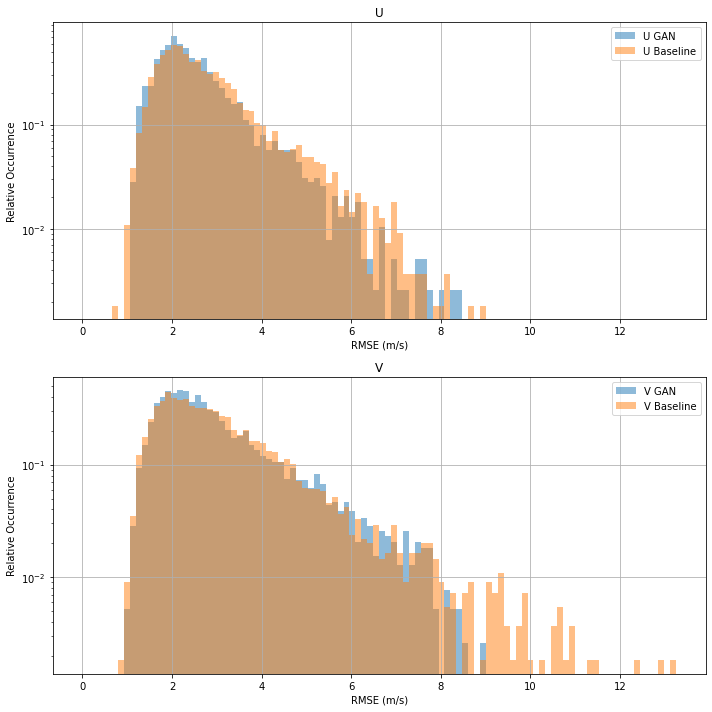

In [113]:
RMSE_GAN_U = calculate_rms_error(gen_imgs_np_U, hr_imgs_np_U)
RMSE_GAN_V = calculate_rms_error(gen_imgs_np_V, hr_imgs_np_V)

fig, axs = plt.subplots(2, 1, figsize=(10,10))

axs[0].hist(RMSE_GAN_U, bins=num_bins, range=bin_range, density=True, alpha=0.5, label="U GAN")
axs[0].hist(U_RMSE_9km, bins=num_bins, range=bin_range, density=True, alpha=0.5, label="U Baseline")
axs[0].set_title('U')


axs[1].hist(RMSE_GAN_V, bins=num_bins, range=bin_range, density=True, alpha=0.5, label="V GAN")
axs[1].hist(V_RMSE_9km, bins=num_bins, range=bin_range, density=True, alpha=0.5, label="V Baseline")
axs[1].set_title('V')

for ax in axs:
    ax.set_xlabel('RMSE (m/s)')
    ax.set_ylabel('Relative Occurrence')
    ax.set_yscale("log")
    ax.legend()
    ax.grid(True)

plt.tight_layout()  # Adjusts subplot params so that subplots fit into the figure area.
plt.show()

Once again, the best images in terms of RMSE are cherry picked and plotted alongside their input low resolution and target medium resolution maps. They are shown in the figures below. As maps across two channels are downscaled, this results in two seperate RMSE for the different velocity components. The RMSE used for picking the best images was then the average of the RMSEs of U and V. 

After having discussed the probability density distribution of the GAN, which largely resembles the baseline distribution, it is no surprise that the quality of the downscaled images is very bad. It could be interpreted that the first and last results have one dominant strong wind zone which is approximately in the same area as the strong winds in the medium resolution target. Since these maps are cherry picked and judging from the probability density distribution above, I would argue, however, that these matching zones are nothing but coincidence that happened to reduce the RMSE such that the images were selected.

In summary, the GAN for downscaling wind as trained in this project, is not able to improve baseline results. Further training and restructuring is necessary to improve the results. It should be noted, however, that the wind downscaling is significantly more difficult than the downscaling of the temperature. This is because, as mentioned in the very beginning of the project, the medium resolution already looks very different from the low resolution image. Additionally, the wind downscaling requires working with 2-channeled data which complicates the training.

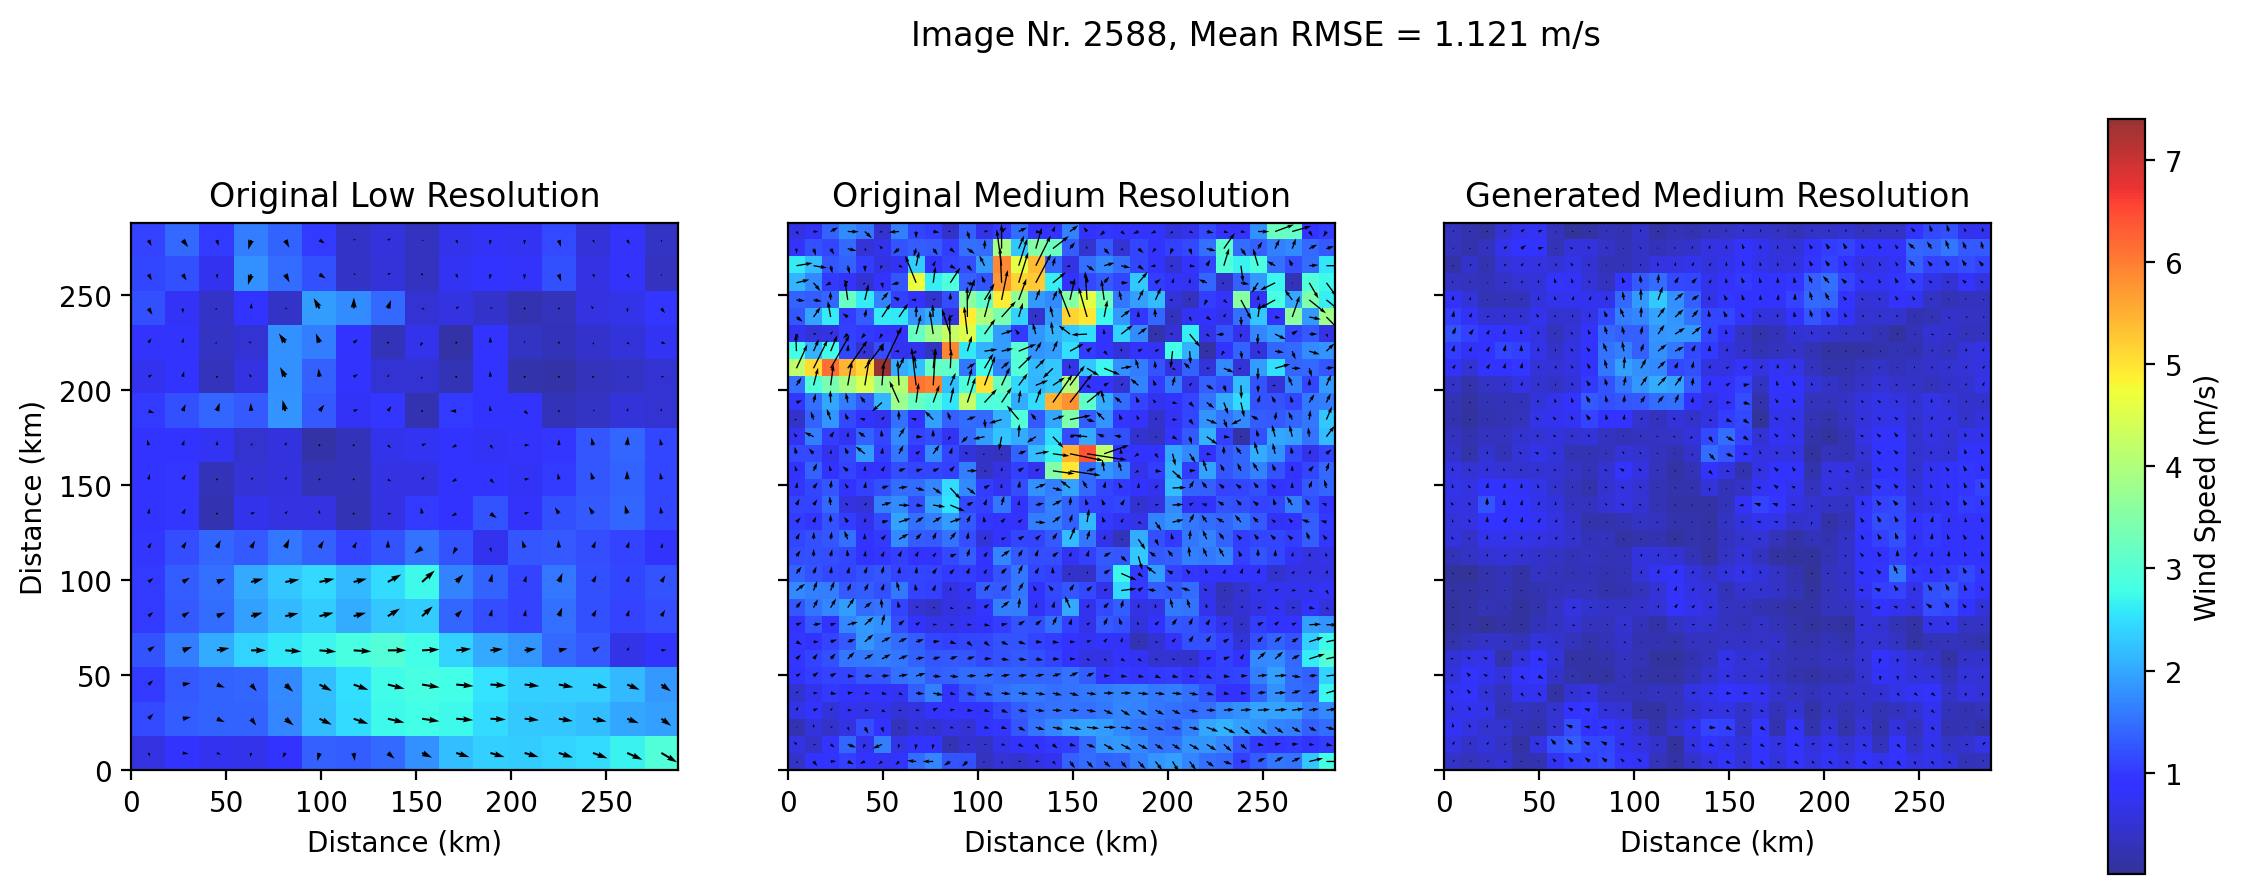

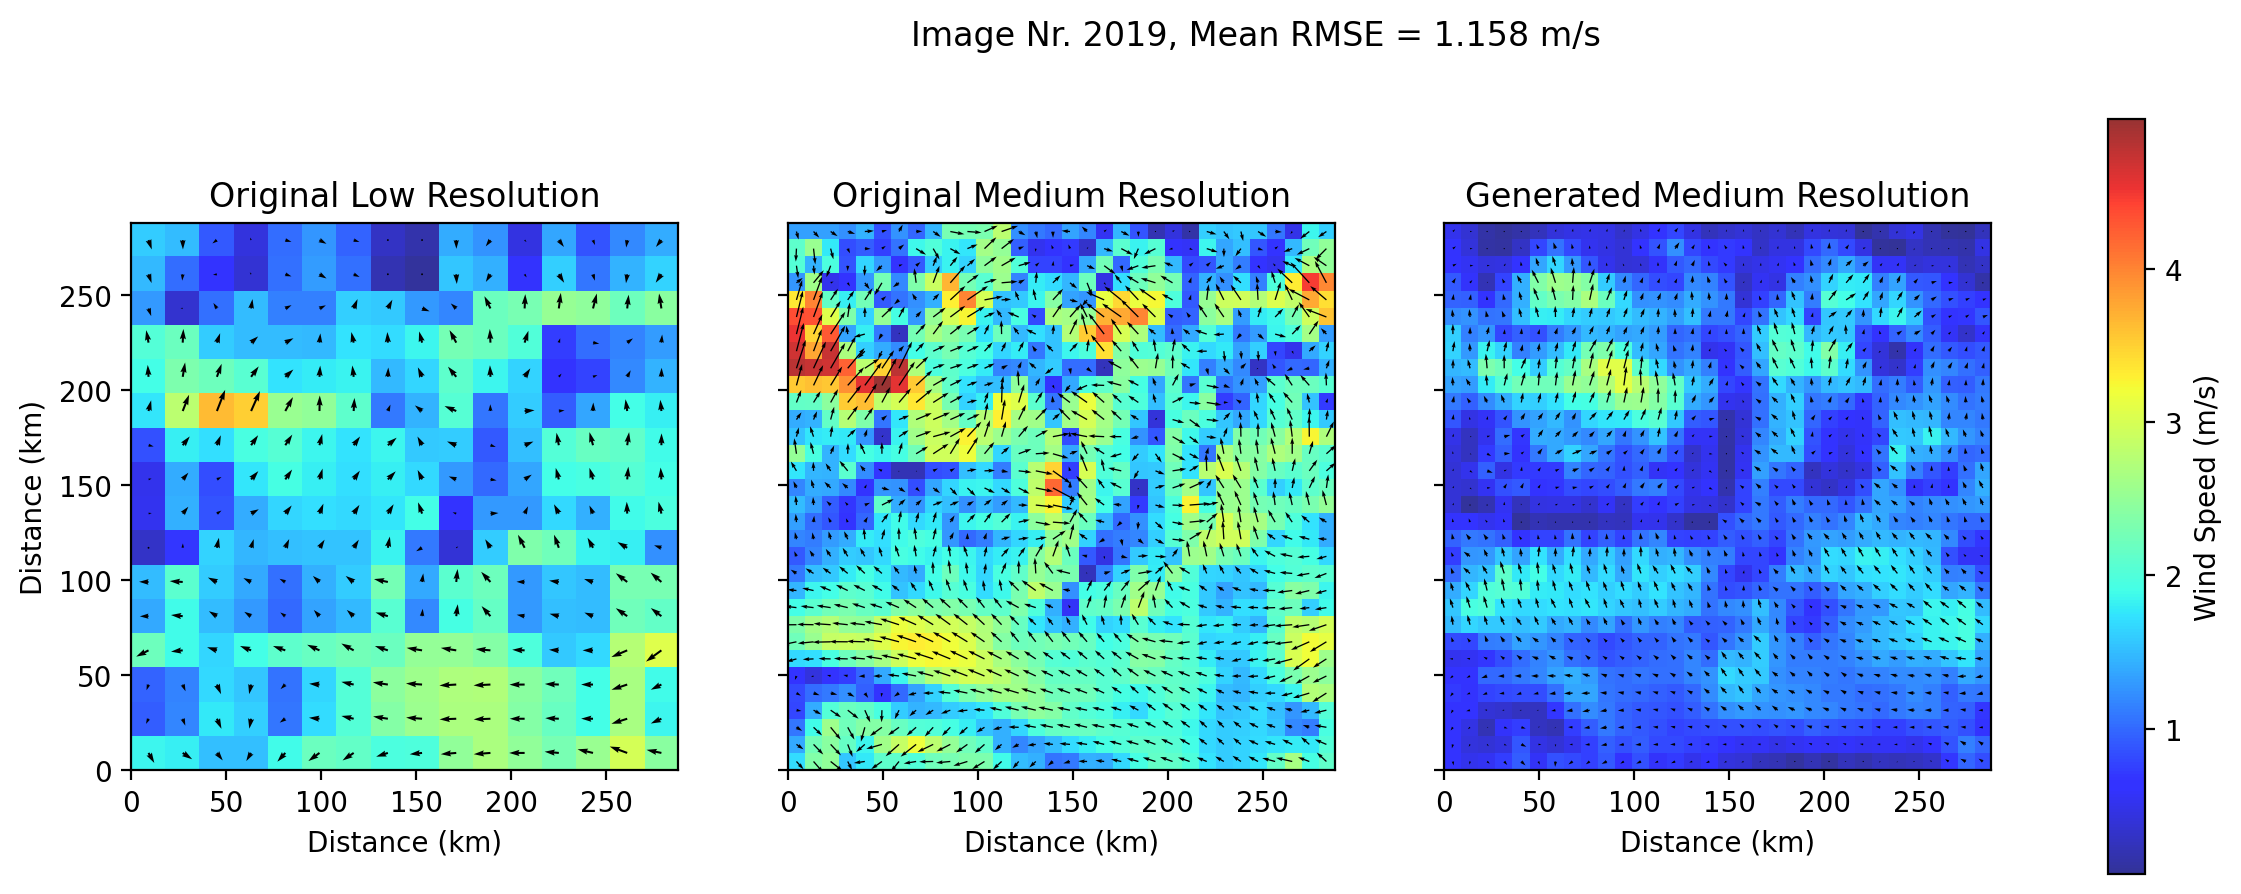

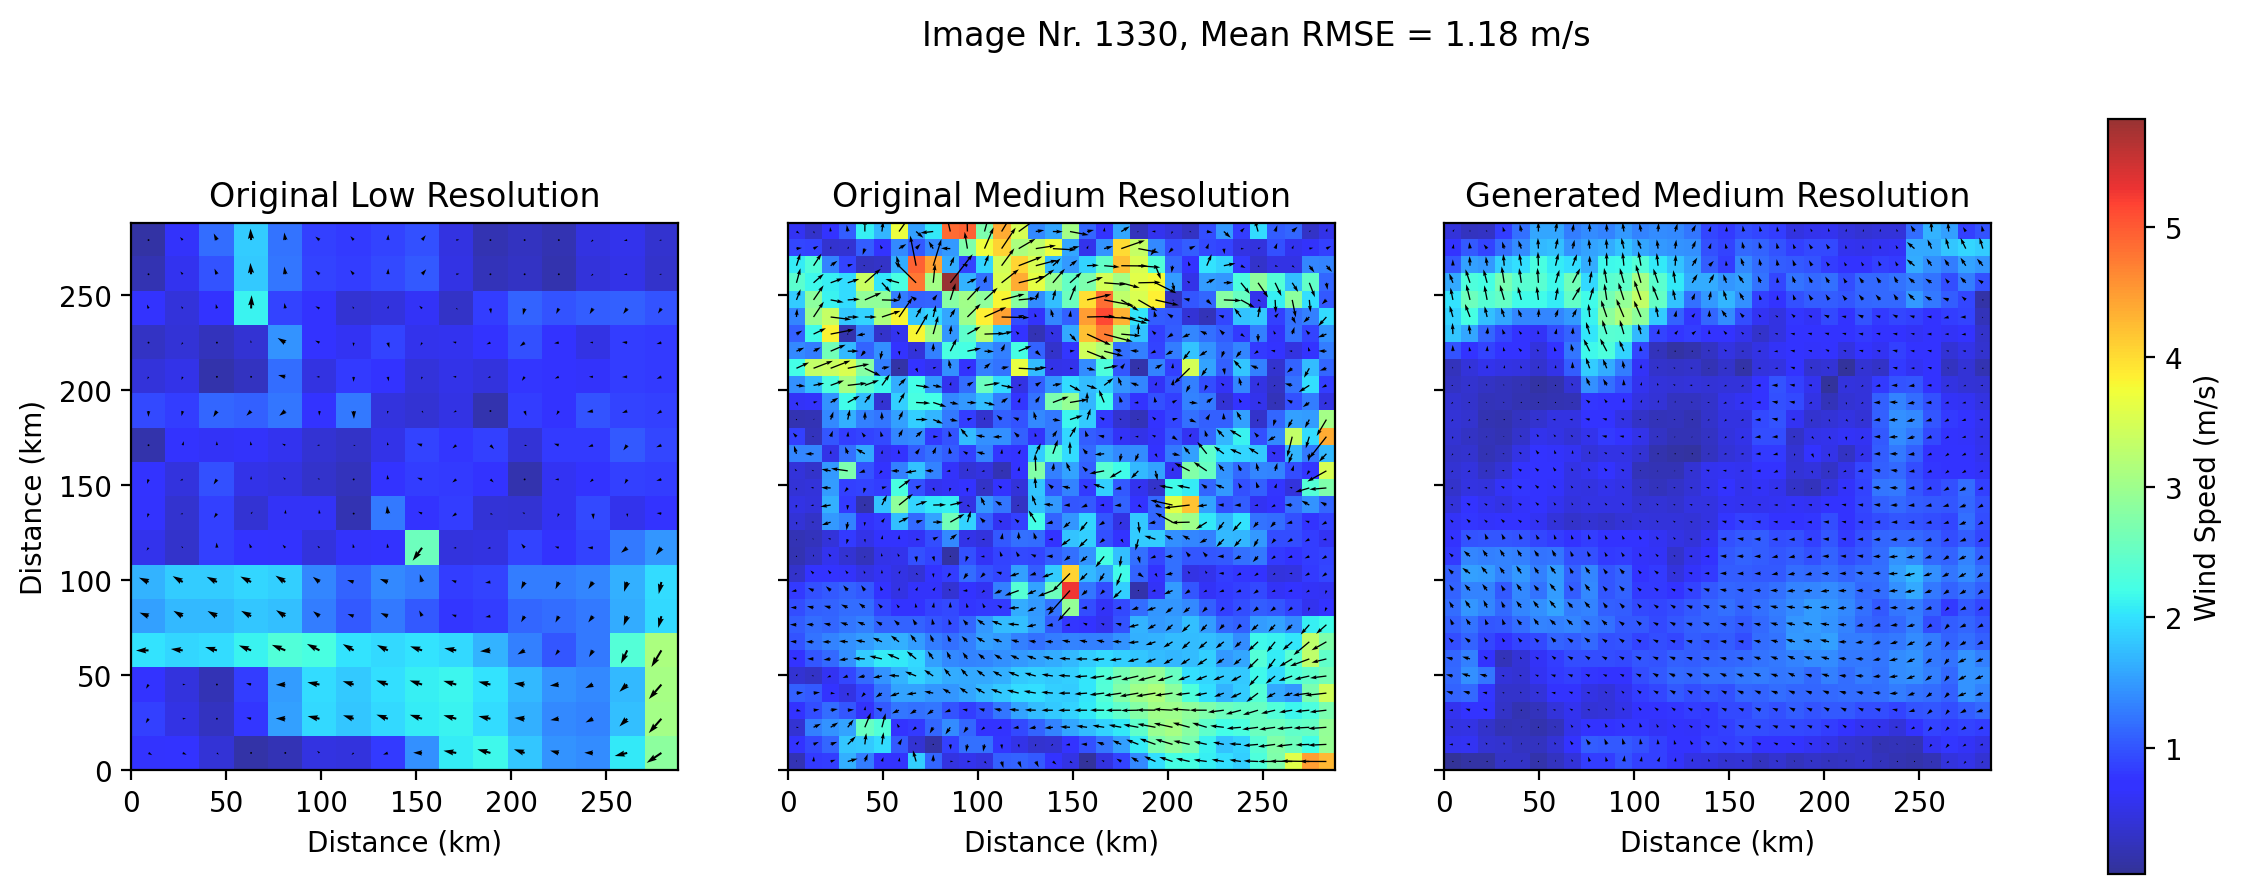

In [114]:
def get_smallest_values(array, k):
    indices = np.argpartition(array, k)[:k]
    values = array[indices]
    sorted_indices = indices[np.argsort(values)]
    sorted_values = values[np.argsort(values)]
    return sorted_values, sorted_indices

RMSEs, idxs = get_smallest_values(np.mean([RMSE_GAN_U, RMSE_GAN_V], axis=0,), 3) # mean RMSE of U and V
cmap = 'jet'

for i, idx in enumerate(idxs):
    wind_speed_gen = calculate_total_velocity(gen_imgs_np_U[idx], gen_imgs_np_V[idx])
    wind_speed_lr = calculate_total_velocity(lr_imgs_np_U[idx], lr_imgs_np_V[idx])
    wind_speed_hr = calculate_total_velocity(hr_imgs_np_U[idx], hr_imgs_np_V[idx])

    vmin = np.min([wind_speed_gen.min(), wind_speed_lr.min(), wind_speed_hr.min()])
    vmax = np.max([wind_speed_gen.max(), wind_speed_lr.max(), wind_speed_hr.max()])
    
    max_wind_speed = np.max([gen_imgs_np_U.max(), gen_imgs_np_V.max(), lr_imgs_np_U.max(), lr_imgs_np_V.max(), hr_imgs_np_U.max(), hr_imgs_np_V.max()])
    arrow_length = 2
    scale_factor = max_wind_speed * arrow_length

    # Plot the images
    fig, axs = plt.subplots(1, 3, figsize=(15, 5), dpi=200, sharey=True)  # Create a figure with 3 subplots

    # Plot the original low resolution image
    axs[0].quiver(x_NCEP_down, x_NCEP_down, lr_imgs_np_U[idx], lr_imgs_np_V[idx], scale=scale_factor)
    im_lr = axs[0].imshow(wind_speed_lr, cmap=cmap, alpha=0.8, origin='lower', extent=[0, area_size, 0, area_size], vmin=vmin, vmax=vmax)
    axs[0].set_title('Original Low Resolution')
    axs[0].set_xlabel('Distance (km)')
    axs[0].set_ylabel('Distance (km)')

    # Plot the original high resolution image
    axs[1].quiver(x_9km, x_9km, hr_imgs_np_U[idx], hr_imgs_np_V[idx], scale=scale_factor)
    im_hr = axs[1].imshow(wind_speed_hr, cmap=cmap, alpha=0.8, origin='lower', extent=[0, area_size, 0, area_size], vmin=vmin, vmax=vmax)
    axs[1].set_title('Original Medium Resolution')
    axs[1].set_xlabel('Distance (km)')

    # Plot the generated high resolution image
    axs[2].quiver(x_9km, x_9km, gen_imgs_np_U[idx], gen_imgs_np_V[idx], scale=scale_factor)
    im_gen = axs[2].imshow(wind_speed_gen, cmap=cmap, alpha=0.8, origin='lower', extent=[0, area_size, 0, area_size], vmin=vmin, vmax=vmax)
    axs[2].set_title('Generated Medium Resolution')
    axs[2].set_xlabel('Distance (km)')
    
    # Remove the axes for all plots
    # for ax in axs:
    #     ax.axis('off')

    # Create a colorbar
    cbar = fig.colorbar(im_gen, ax=axs, location='right')
    cbar.set_label('Wind Speed (m/s)')

    plt.suptitle(f'Image Nr. {idx}, Mean RMSE = {RMSEs[i]:.{4}} m/s')

    plt.show()

# f)
To go from medium resolution to high resolution using a GAN is very similar to what has been done in c). Almost the same GAN structure can be used.

Since we are going from 9 km resolution to 3 km resolution which is a factor of 3 in each spatial dimension, we need to adjust the deconvolution layer of the Generator from 
self.conv1 = nn.ConvTranspose2d(1, 64, kernel_size=4, stride=2, padding=1) to
self.conv1 = nn.ConvTranspose2d(1, 64, kernel_size=3, stride=3, padding=1) following the formula output_resolution = (input_resolution - 1) * stride - 2 * padding + kernel_size. The rest of the generator architecture can stay the same as it is independent of resolution.

The discriminator also works largely independently of resolution so can be kept mostly as is. One required adaptation would be changing self.fc = nn.Linear(256*32*32, 1) to self.fc = nn.Linear(256*96*96, 1) to accomodate for the new hgiher resolution. 

The training procedure can also be copied from c). Obviously, the training data has to be adjusted to go from 9 to 3 km resolution. Furthermore, as this is a new problem for the GAN, hyperparameters have to be optimized again. Once training is finished, this GAN and the GAN from c) can be combined to perform a downscaling from 18 to 3 km resolution.

Due to temporal constraints the described plan has not been implemented and performed.